# Trabajo práctico integrador: Análisis de datos

Integrantes:
- Julio Agustín Donadello (a1505)
- Diego Braga (a1522)
- Eduardo Echeverria (a1516)
- Marco Joel Isidro (a1520)
- Diego Sarina (a1519)

# Introducción

Para el presente trabajo se utilizó un dataset sobre el clima en Australia, el cual contiene información sobre diferentes ciudades de Australia durante 10 años, incluyendo datos como la temperatura, la velocidad y dirección del viento, las precipitaciones, entre otros.

Dataset utilizado: [Kaggle - Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)

El dataset contiene las siguientes columnas:
* **Date:** fecha de la observación.
* **Location:** nombre de la ubicación de la estación meteorológica.
* **MinTemp:** temperatura mínima en grados Celsius.
* **MaxTemp:** temperatura máxima en grados Celsius.
* **Rainfall:** precipitaciones durante el día en mm.
* **Evaporation:** evaporación en mm durante 24h hasta las 9am.
* **Sunshine:** horas de sol en el día.
* **WindGustDir:** dirección de la ráfaga de viento más fuerte.
* **WindGustSpeed:** velocidad de la ráfaga de viento más fuerte en km/h.
* **WindDir9am:** dirección del viento a las 9am.
* **WindDir3pm:** dirección del viento a las 3pm.
* **WindSpeed9am:** velocidad del viento promediando los 10 minutos previos a las 9am en km/h.
* **WindSpeed3pm:** velocidad del viento promediando los 10 minutos previos a las 3pm en km/h.
* **Humidity9am:** humedad a las 9am en porcentaje.
* **Humidity3pm:** humedad a las 3pm en porcentaje.
* **Pressure9am:** presión a las 9am en hpa.
* **Pressure3pm:** presión a las 3pm en hpa.
* **Cloud9am:** Fracción del cielo cubierta por nubes a las 9am en oktas.
* **Cloud3pm:** Fracción del cielo cubierta por nubes a las 3pm en oktas.
* **Temp9am:** temperatura a las 9am en grados Celsius.
* **Temp3pm:** temperatura a las 3pm en grados Celsius.
* **RainToday:** si llovió hoy más de 1mm durante 24h hasta las 9am.
* **RainTomorrow:** si lloverá mañana.

Un dato importante a la hora de realizar el análisis exploratorio, la limpieza y la preparación de los datos es el objetivo que se busca alcanzar con el análisis. En este caso, el objetivo es predecir si lloverá al día siguiente o no, en función de los datos meteorológicos del día actual.

Antes de comenzar se importan todas las librerías necesarias con el objetivo de brindar claridad al código y facilitar su lectura.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats
import matplotlib.dates as mdates
import missingno as msno

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

#configuraciones generales
pd.set_option('display.max_columns', None)

# Análisis exploratorio

In [3]:
#carga de los datos
weather_df = pd.read_csv("./dataset/weatherAUS.csv")

#cantidad de elementos en el dataset
print(weather_df.shape)

(145460, 23)


In [4]:
# Visualizacion de las primeras 10 filas
weather_df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
weather_df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [6]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


En base a los datos presentados hasta ahora se pueden destacar los siguientes puntos:
* El dataset contiene 145460 registros y 23 columnas.
* Las únicas columnas con valores negativos son MinTemp, MaxTemp, Temp9am y Temp3pm. Lo cual es correcto ya que la temperatura puede ser negativa a diferencia de las variables restantes.
* La mayoría de las columnas tienen datos faltantes. Las columnas con mayor cantidad de datos faltantes son Sunshine, Evaporation, Cloud3pm y Cloud9am.


In [7]:
#análisis rápido de los tipos de datos de cada variable
print(f"Dataset info: \n{weather_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
dtypes = weather_df.dtypes 
num_columns = dtypes[dtypes == 'int64'].count() + dtypes[dtypes == 'float64'].count()
cat_columns = dtypes[dtypes == 'object'].count()
print(f"Cant. features numéricos: {num_columns} \nCant. features no numéricos: {cat_columns}")

Cant. features numéricos: 16 
Cant. features no numéricos: 7


De la celda anterior, vemos que el dataset contiene informacion categorica (object) y numerica (int/float). Ademas de que a priori hay datos faltantes.

## Identificación de tipos de datos

Para comenzar con el análisis exploratorio de los datos, se procede a identificar los tipos de datos de cada columna. Clasificando las columnas en datos cualitativos y cuantitativos, con sus respectivas subcategorías.

| Variable | Tipo de dato | Subcategoría | Escala de medida |
| --- | --- | --- | --- |
| MinTemp | Cuantitativa | Continua | de intervalo |
| MaxTemp | Cuantitativa | Continua | de intervalo |
| Temp9am | Cuantitativa | Continua | de intervalo |
| Temp3pm | Cuantitativa | Continua | de intervalo |
| Rainfall | Cuantitativa | Continua | de razón |
| Evaporation | Cuantitativa | Continua | de razón |
| Sunshine | Cuantitativa | Continua | de razón |
| WindGustSpeed | Cuantitativa | Continua | de razón |
| WindSpeed9am | Cuantitativa | Continua | de razón |
| WindSpeed3pm | Cuantitativa | Continua | de razón |
| Humidity9am | Cuantitativa | Continua | de razón |
| Humidity3pm | Cuantitativa | Continua | de razón |
| Pressure9am | Cuantitativa | Continua | de razón |
| Pressure3pm | Cuantitativa | Continua | de razón |
| Cloud9am | Cuantitativa | Discreta | de razón |
| Cloud3pm | Cuantitativa | Discreta | de razón |
| Date | Cualitativa | - | Ordinal |
| WindGustDir | Cualitativa | - | Ordinal |
| WindDir9am | Cualitativa | - | Ordinal |
| WindDir3pm | Cualitativa | - | Ordinal |
| Location | Cualitativa | - | Nominal |
| RainToday | Cualitativa | - | Nominal |
| RainTomorrow | Cualitativa | - | Nominal |


## Identificación de variables de entrada y salida.

Las variables de entrada son aquellas que se utilizan para predecir la variable de salida. En este caso, las variables de entrada son todas las columnas del dataset, excepto la columna "RainTomorrow". La variable de salida es la columna "RainTomorrow" la cual se busca predecir.

### Variable de salida: RainTomorrow

Como se mencionó anteriormente, la variable de salida es la columna "RainTomorrow".

In [9]:
VARIABLE_SALIDA = 'RainTomorrow'
weather_df[VARIABLE_SALIDA].unique()

array(['No', 'Yes', nan], dtype=object)

Esta columna contiene dos valores posibles: "Yes" si lloverá al día siguiente y "No" si no lloverá. Si bien la variable presenta datos faltantes, se puede observar que la variable de salida es binaria por lo que se puede considerar un problema de clasificación binaria. Por lo tanto, se considera favorable convertir la variable de salida a valores numéricos, asignando 1 a "Yes" y 0 a "No".

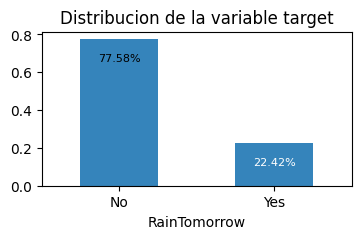

RainToday
No     0.775807
Yes    0.224193
Name: proportion, dtype: float64


In [10]:
fig = plt.figure(figsize=(4, 2))
ax = weather_df[VARIABLE_SALIDA].value_counts(normalize=True).plot(kind='bar', alpha=0.9, rot=0)

for idx, p in enumerate(ax.patches):
    color = 'black' if idx == 0 else 'white'
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',
                xytext=(0, -10), # ajusto la etiqueta
                textcoords='offset points',
                fontsize=8,
                color=color)
plt.title('Distribucion de la variable target')
plt.show()

print(weather_df["RainToday"].value_counts(normalize=True))

Como se puede observar, la variable de salida presenta un desbalanceo en los datos, ya que la cantidad de registros con "No" es mayor a la cantidad de registros con "Yes". Esto puede afectar el rendimiento de los modelos de clasificación, por lo que se deberá tener en cuenta al momento de evaluar los modelos o al de la preparación de los datos.

### Variables de entrada

In [11]:
VARIABLES_NUMERICAS = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
VARIABLES_CATEGORICAS = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [12]:
# visualización de datos númericos
weather_df[VARIABLES_NUMERICAS]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [13]:
# visualización de datos categóricos
weather_df[VARIABLES_CATEGORICAS]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No
...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No
145456,2017-06-22,Uluru,NNW,SE,N,No
145457,2017-06-23,Uluru,N,SE,WNW,No
145458,2017-06-24,Uluru,SE,SSE,N,No


Vemos que todas las columnas aportan información útil para el entrenamiento de un modelo. No se detecta la prescencia de códigos o índices instrascendentes en el dataset. Por ende todas pueden funcionar como variables de entrada a excepción de la variable a utilizar como target.

#### Númericas

Las variables númericas que se analizarán son las siguientes, agrupandolas en dos categorías para facilitar su análisis:
* **Variables de temperatura:** MinTemp, MaxTemp, Temp9am, Temp3pm.
* **Variables de precipitaciones:** Rainfall, Evaporation.
* **Variables de velocidad del viento:** WindGustSpeed, WindSpeed9am, WindSpeed3pm.
* **Variables de humedad:** Humidity9am, Humidity3pm.
* **Variables de presión:** Pressure9am, Pressure3pm.
* **Variables de nubosidad:** Cloud9am, Cloud3pm.
* **Variables de horas de sol:** Sunshine.

A continuación se muestra un resumen de las distribuciones y los boxplt de las variables númericas, para posteriormente empezar el análisis de cada una de ellas.

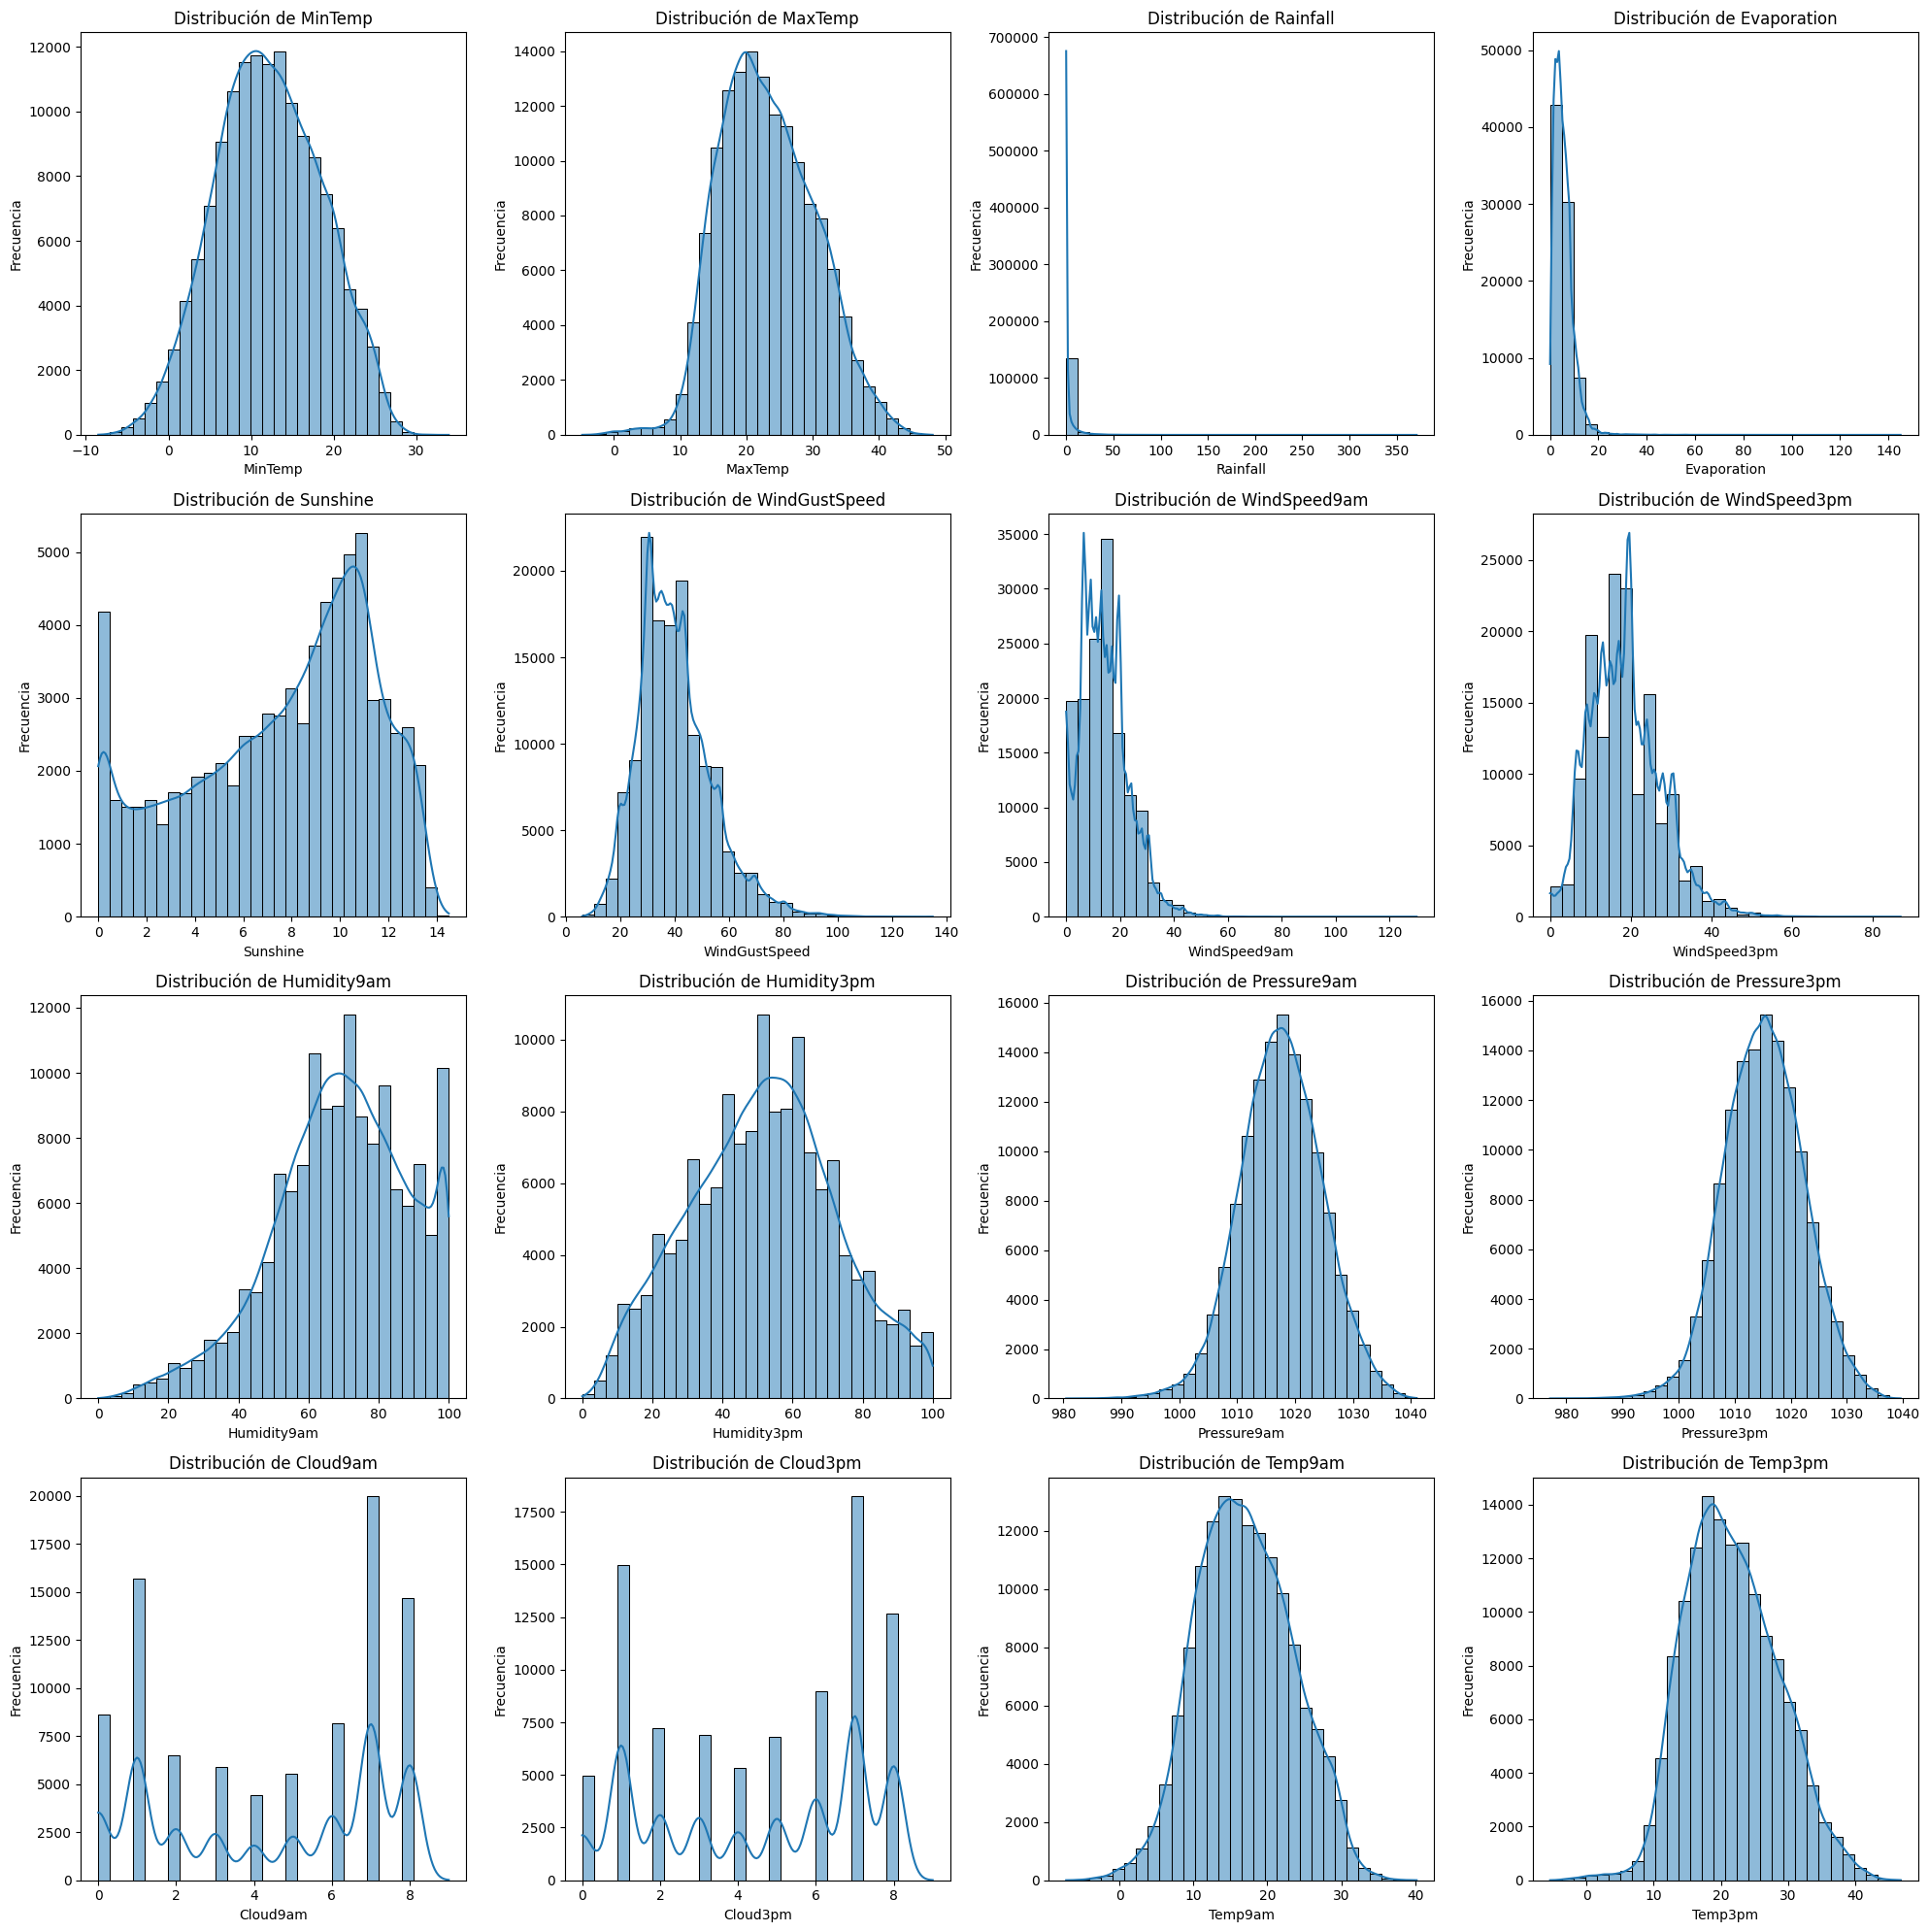

In [14]:
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(VARIABLES_NUMERICAS):
    row = i // ncols
    col_idx = i % ncols
    sns.histplot(weather_df[col], kde=True, bins=30, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

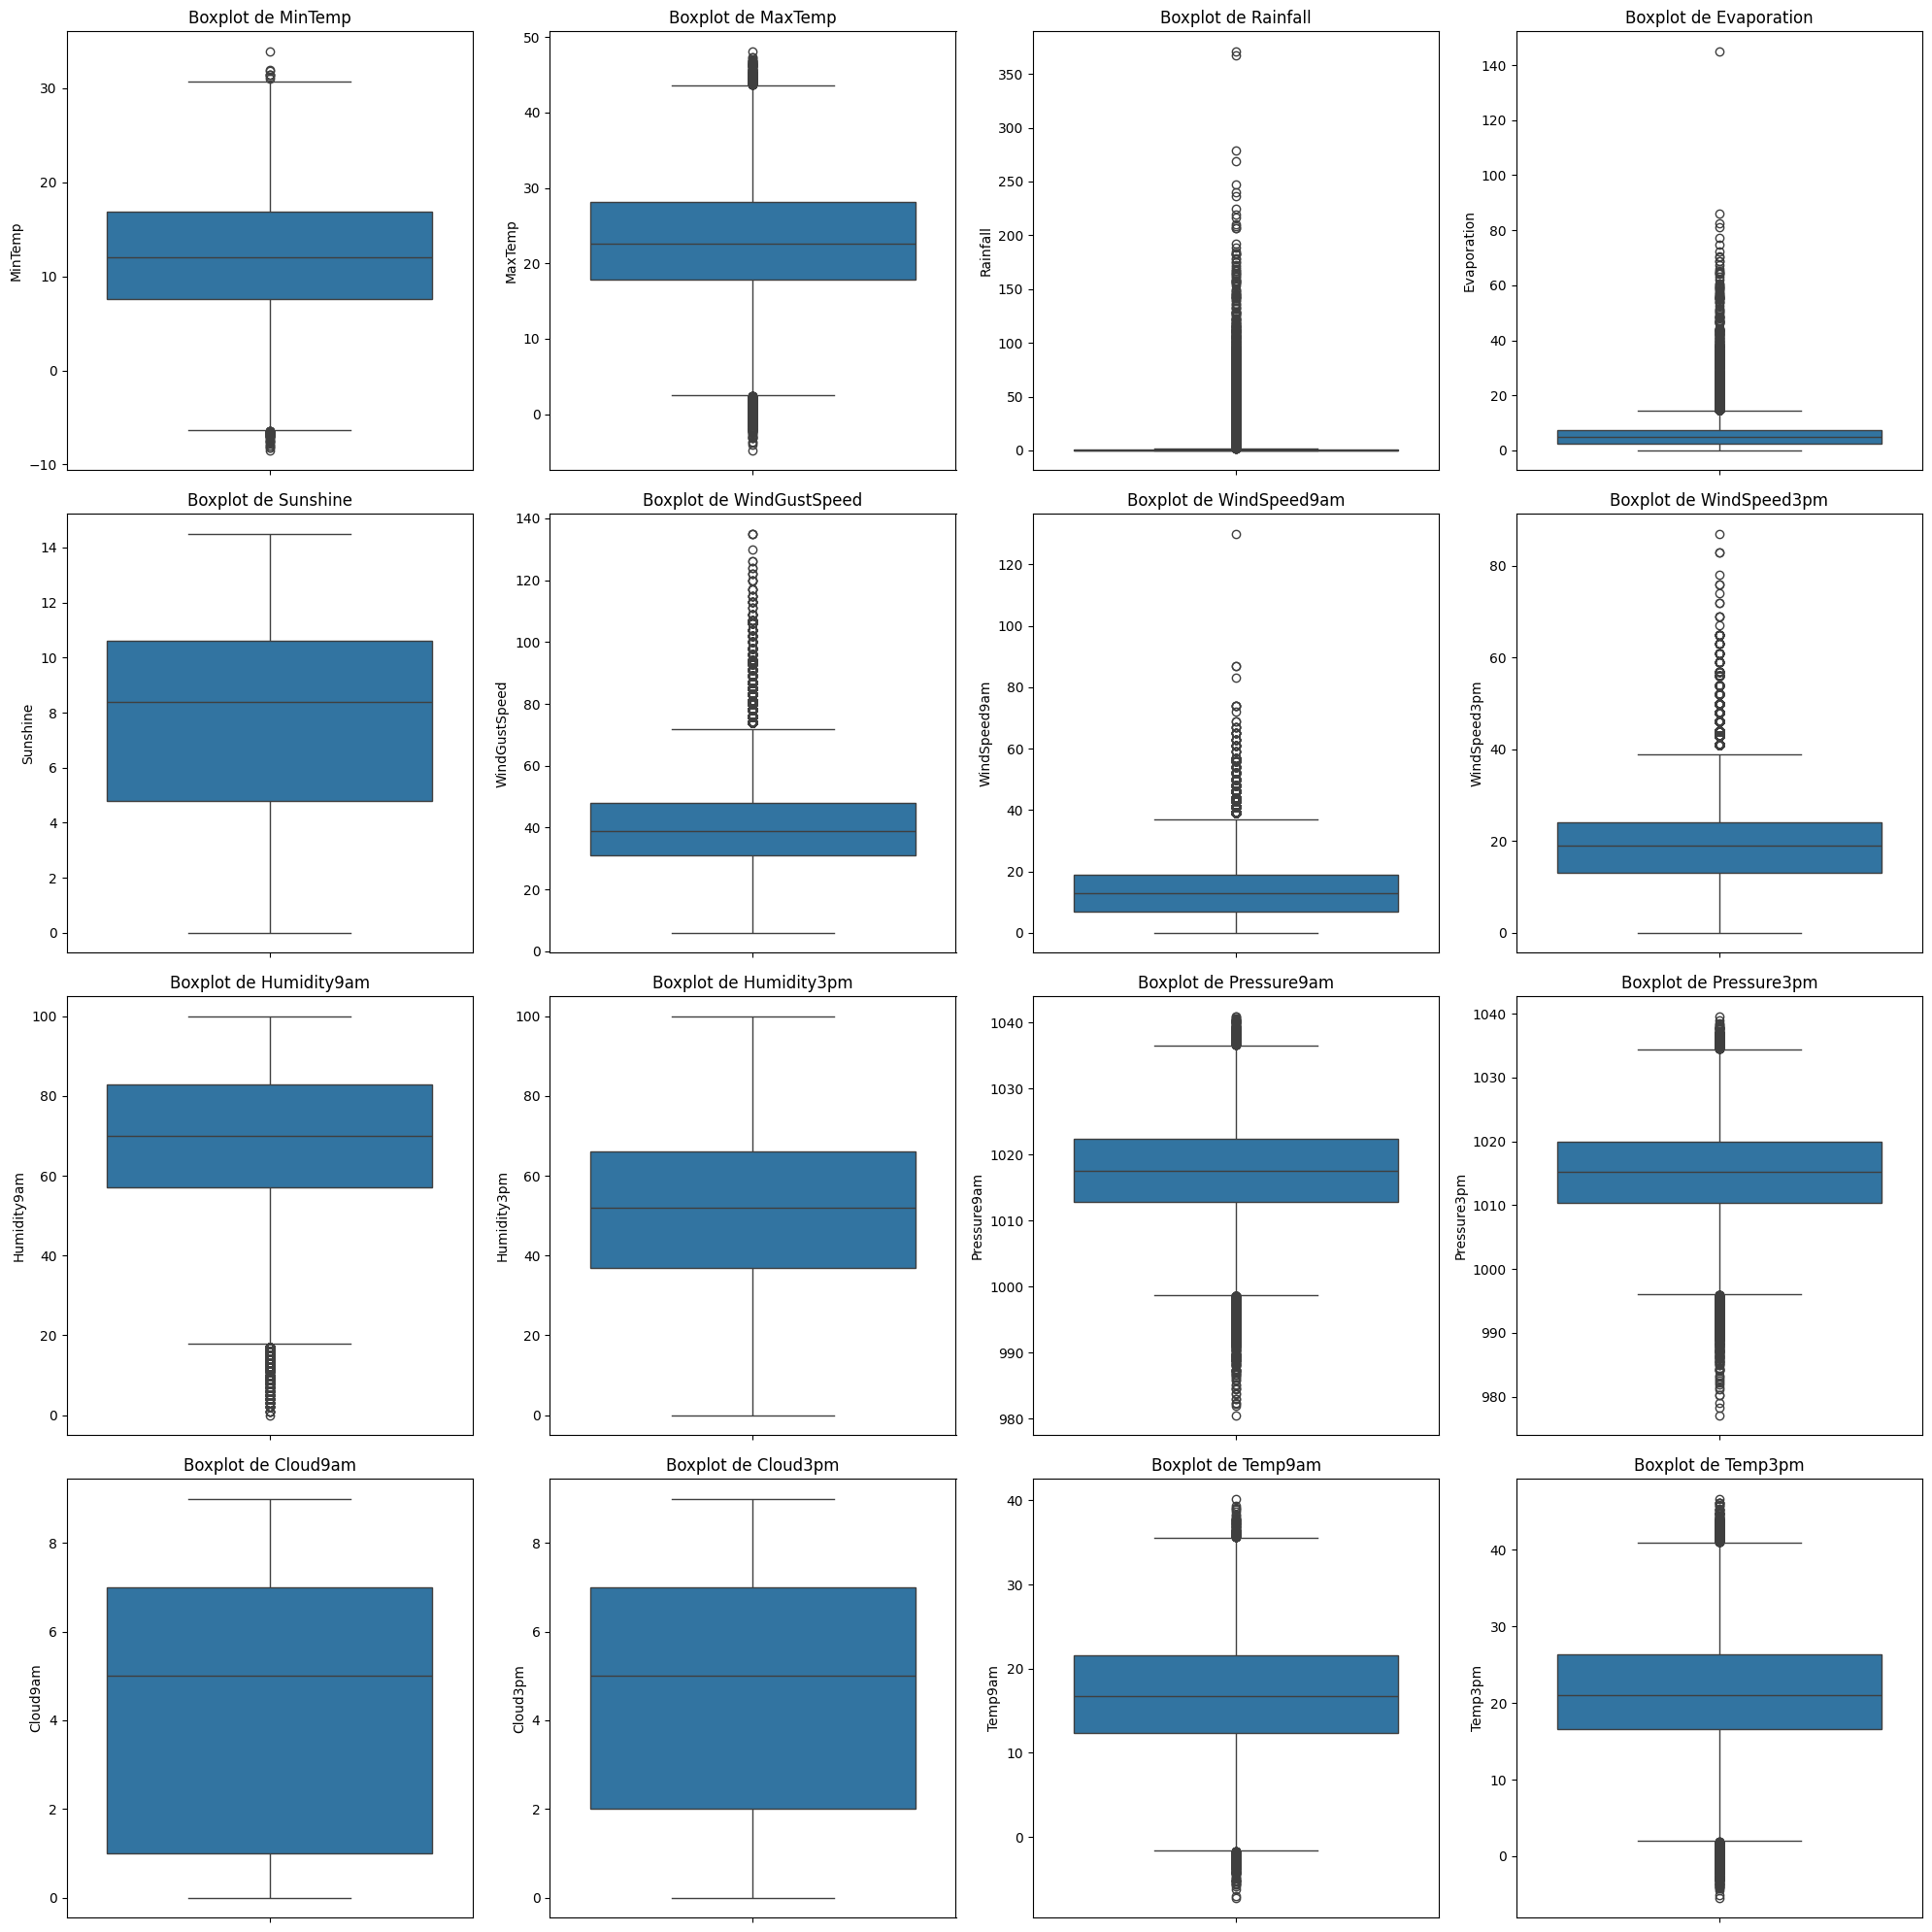

In [15]:
#boxplot de las variables numéricas
nrows, ncols = 4, 4
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))

for i, col in enumerate(VARIABLES_NUMERICAS):
    row = i // ncols
    col_idx = i % ncols
    sns.boxplot(y=col, data=weather_df, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')
    axes[row, col_idx].set_ylabel(col)

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()




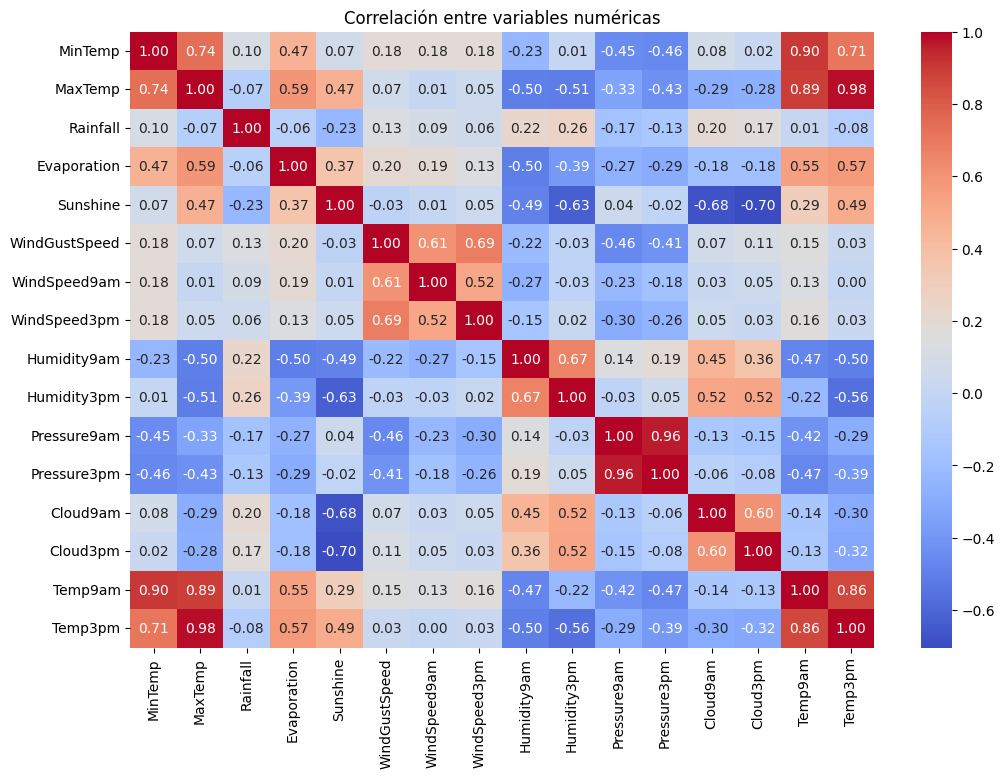

In [16]:
# correlación seaborn entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(weather_df[VARIABLES_NUMERICAS].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.show()

En un primer momento se observan diferentes formas de distribuciónes que se van a tener que ir analizando, así como también la presencia de outliers en algunas variables que pueden ser problemáticos para el análisis.
Además se pueden observer una alta correlación entre las variables de temperatura, lo cual es esperado ya que la temperatura a diferentes horas del día debería ser similar. Otra correlación que parece importante son las velocidades del viento entre ellas, o la variable sunshine con Cloud9am y Cloud3pm.

##### Variables de temperatura

Las variables MinTemp, MaxTemp, Temp9am y Temp3pm son variables cuantitativas continuas de intervalo que indican la temperatura mínima, máxima, a las 9am y a las 3pm respectivamente en grados Celsius.

In [17]:
TEMPERATURE_VARS = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
weather_df[TEMPERATURE_VARS].describe()

,MinTemp,MaxTemp,Temp9am,Temp3pm
count,143975.000000,144199.000000,143693.000000,141851.00000
mean,12.194034,23.221348,16.990631,21.68339
std,6.398495,7.119049,6.488753,6.93665
min,-8.500000,-4.800000,-7.200000,-5.40000
25%,7.600000,17.900000,12.300000,16.60000
50%,12.000000,22.600000,16.700000,21.10000
75%,16.900000,28.200000,21.600000,26.40000
max,33.900000,48.100000,40.200000,46.70000


Se observa que las variables MinTemp, MaxTemp, Temp9am y Temp3pm tienen un rango de valores acorde a la naturalidad de la variable. A continuación se analiza si los valores de MinTemp son siempre menores o iguales a los de MaxTemp.

In [18]:
weather_temp_nonull = weather_df[TEMPERATURE_VARS].dropna()
print("¿Todos los valores de MinTemp son menores o iguales a los de MaxTemp?:", (weather_temp_nonull['MinTemp'] <= weather_temp_nonull['MaxTemp']).all())

¿Todos los valores de MinTemp son menores o iguales a los de MaxTemp?: True


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

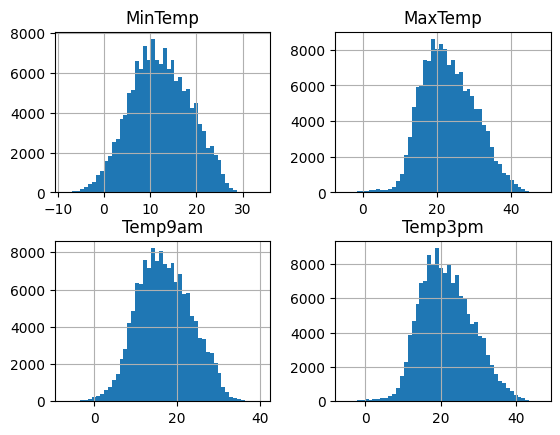

In [19]:
weather_df[TEMPERATURE_VARS].hist(bins=50)

Se aprecia que las cuatro variables se comportan de manera bastante similar y con distribuciones que simple vista parecen aproximarse a la Normal. A continuación se analizarán gráficos QQ para visualizar mejor este ajuste.

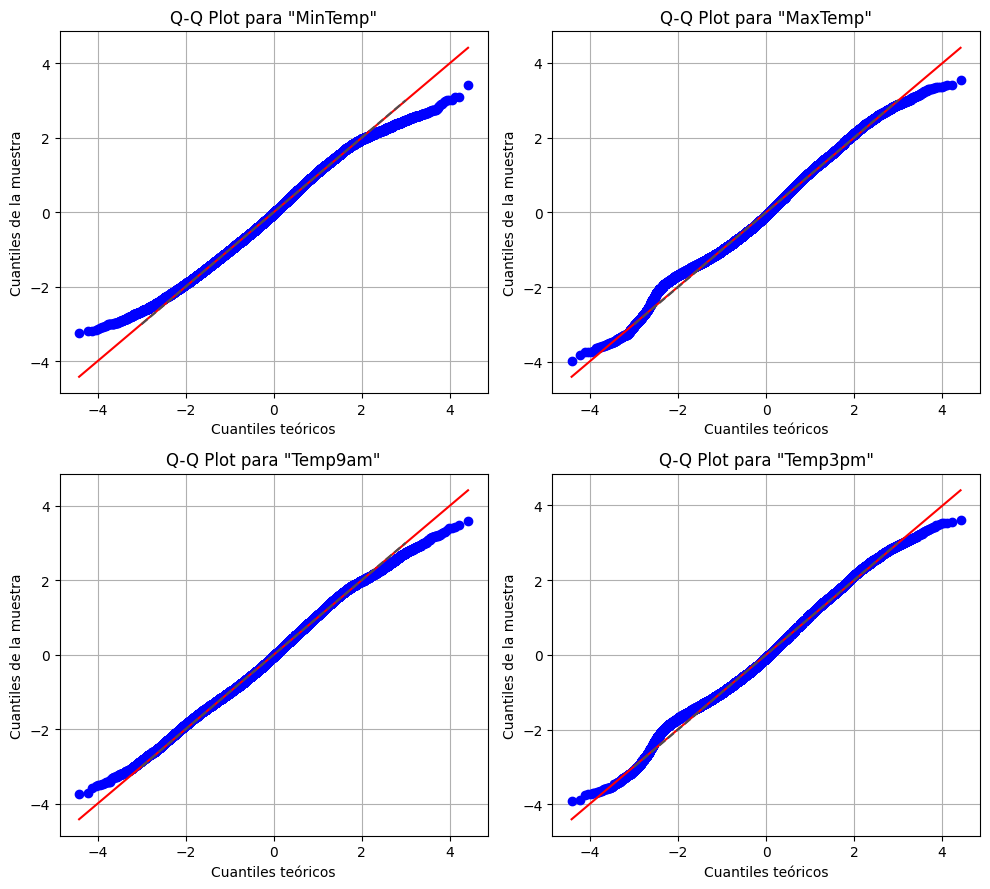

In [20]:
# Calcular datos estandarizados
temp_vars_standarized = (weather_temp_nonull[TEMPERATURE_VARS] - weather_temp_nonull[TEMPERATURE_VARS].mean()) / weather_temp_nonull[TEMPERATURE_VARS].std()

# Crear una figura con cuatro subgráficos
fig, axes = plt.subplots(2, 2, figsize=(10, 9))

# Iterar sobre las variables de temperatura y graficar el Q-Q plot en cada subgráfico
for i, var in enumerate(TEMPERATURE_VARS):
    ax = axes[i//2, i%2]
    stats.probplot(temp_vars_standarized[var], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot para "{var}"')
    ax.set_xlabel('Cuantiles teóricos')
    ax.set_ylabel('Cuantiles de la muestra')
    ax.grid(True)
    ax.plot([-3, 3], [-3, 3], ls="--", c=".3")  # Agregar línea de referencia

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Observando los Q-Q plots se puede observar que para las cuatro variables de temperatura su distribución parece asemejarse bastante a una Normal. Los cuatro casos presentan colas algo livianas.

##### Variables de precipitaciones

La variable Rainfall es una variable cuantitativa continua de razón que indica las precipitaciones durante el día en mm.

In [21]:
weather_df['Rainfall'].describe()

count    142199.000000
mean          2.360918
std           8.478060
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max         371.000000
Name: Rainfall, dtype: float64

<Axes: >

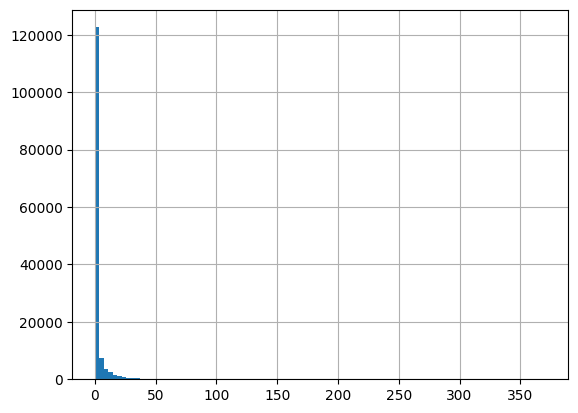

In [22]:
weather_df['Rainfall'].hist(bins=100)

En este caso la distribución de los datos claramente no es normal y se puede apreciar la gran cantidad de días sin acumulados de lluvia registrados en el dataset (la mayoría de las observaciones). Además, se observa que la variable presenta valores atípicos, aunque los mismos son físicamente posibles, pueden perjudicar en el entrenamiento del modelo.

In [23]:
#porcentaje de valores que valen más de 50
rainfall_over_50 = weather_df['Rainfall'][weather_df['Rainfall'] > 50]
rainfall_over_50_percentage = 100 * len(rainfall_over_50) / len(weather_df['Rainfall'])
print(f'Porcentaje de valores de Rainfall mayores a 50: {rainfall_over_50_percentage:.2f}%')

Porcentaje de valores de Rainfall mayores a 50: 0.55%


In [24]:
weather_df['Rainfall'].value_counts()

Rainfall
0.0      91080
0.2       8761
0.4       3782
0.6       2592
0.8       2056
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: count, Length: 681, dtype: int64

La variable Evaporation es una variable cuantitativa continua de razón que indica la evaporación en mm durante 24h hasta las 9am.

In [25]:
weather_df['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

Se pueden observar una gran cantidad de valores faltantes en la variable, lo cual puede perjudicar en el entrenamiento del modelo y se deberá tener en cuenta al momento de realizar la limpieza de los datos.

<Axes: >

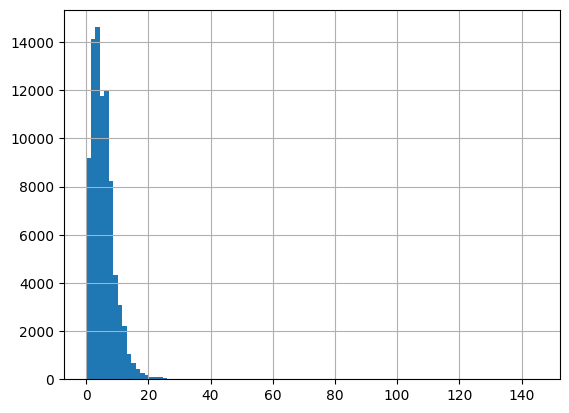

In [26]:
weather_df['Evaporation'].hist(bins=100)

Se observa una distribución oblicua con una cola más pesada hacia la derecha. A la izquierda está truncada por el valor 0, que es el mínimo que puede tomar.

##### Variables de velocidad del viento

Las variables WindGustSpeed, WindSpeed9am y WindSpeed3pm son variables cuantitativas continuas de razón que indican la velocidad del viento en km/h.

In [27]:
WIND_SPEED_VARS = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']
weather_df[WIND_SPEED_VARS].describe()

,WindGustSpeed,WindSpeed9am,WindSpeed3pm
count,135197.000000,143693.000000,142398.000000
mean,40.035230,14.043426,18.662657
std,13.607062,8.915375,8.809800
min,6.000000,0.000000,0.000000
25%,31.000000,7.000000,13.000000
50%,39.000000,13.000000,19.000000
75%,48.000000,19.000000,24.000000
max,135.000000,130.000000,87.000000


array([[<Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>],
       [<Axes: title={'center': 'WindSpeed3pm'}>, <Axes: >]], dtype=object)

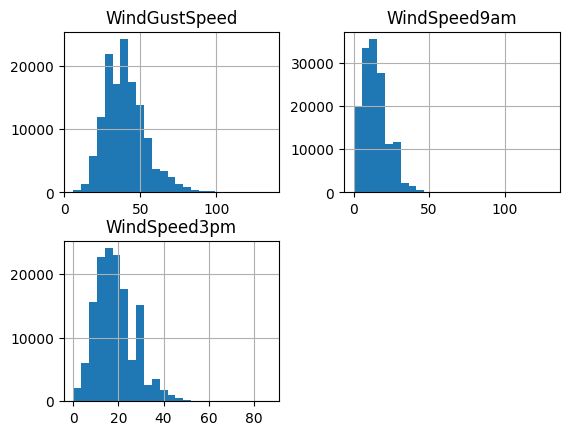

In [28]:
weather_df[WIND_SPEED_VARS].hist(bins=25)

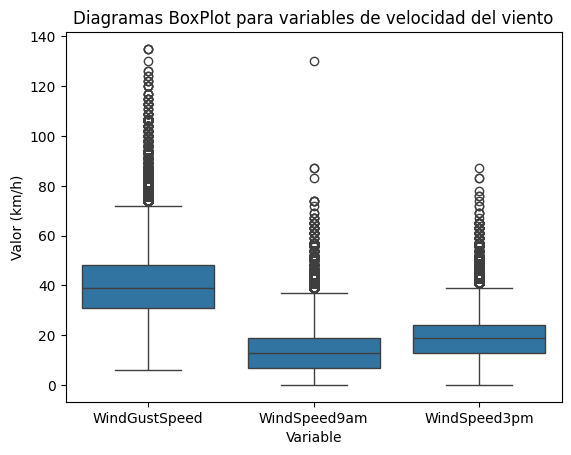

In [29]:
melt_dataset = pd.melt(weather_df)
melt_dataset = melt_dataset[melt_dataset['variable'].isin(WIND_SPEED_VARS)]
melt_dataset = melt_dataset.rename({'variable': 'Variable', 'value': 'Valor (km/h)'}, axis=1)

# Crear el gráfico de caja
sns.boxplot(data=melt_dataset, x='Variable', y='Valor (km/h)')

# Establecer el título del gráfico
plt.title('Diagramas BoxPlot para variables de velocidad del viento')

# Mostrar el gráfico
plt.show()

A simple vista pueden observarse distribuciones algo oblicuas y con ciertas irregularidades en los valores del histograma. Además se observa que las tres variables presentan valores atípicos, aunque los mismos son físicamente posibles y no parecen ser errores de medición. Tambien es lógico que las variables de WindSpeed9am y WindSpeed3pm tengan valores más bajos que WindGustSpeed, debido a que se restringen a un intervalo de tiempo más corto.

In [30]:
# Se determina qué posibles valores tiene la velocidad del viento en las variables dadas, de forma de encontrar alguna particularidad.
unique_values_WindGustSpeed = weather_df['WindGustSpeed'].unique()
unique_values_WindSpeed9am = weather_df['WindSpeed9am'].unique()
unique_values_WindSpeed3pm = weather_df['WindSpeed3pm'].unique()
unique_values_WindGustSpeed.sort()
unique_values_WindSpeed9am.sort()
unique_values_WindSpeed3pm.sort()

print('Valores únicos para WindGustSpeed: ', unique_values_WindGustSpeed)
print('Valores únicos para WindSpeed9am: ', unique_values_WindSpeed9am)
print('Valores únicos para WindSpeed3pm: ', unique_values_WindSpeed3pm)

Valores únicos para WindGustSpeed:  [  6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.  28.  30.
  31.  33.  35.  37.  39.  41.  43.  44.  46.  48.  50.  52.  54.  56.
  57.  59.  61.  63.  65.  67.  69.  70.  72.  74.  76.  78.  80.  81.
  83.  85.  87.  89.  91.  93.  94.  96.  98. 100. 102. 104. 106. 107.
 109. 111. 113. 115. 117. 120. 122. 124. 126. 130. 135.  nan]
Valores únicos para WindSpeed9am:  [  0.   2.   4.   6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.
  26.  28.  30.  31.  33.  35.  37.  39.  41.  43.  44.  46.  48.  50.
  52.  54.  56.  57.  59.  61.  63.  65.  67.  69.  72.  74.  83.  87.
 130.  nan]
Valores únicos para WindSpeed3pm:  [ 0.  2.  4.  6.  7.  9. 11. 13. 15. 17. 19. 20. 22. 24. 26. 28. 30. 31.
 33. 35. 37. 39. 41. 43. 44. 46. 48. 50. 52. 54. 56. 57. 59. 61. 63. 65.
 67. 69. 72. 74. 76. 78. 83. 87. nan]


Para las tres variables tenemos que los valores, a pesar de corresponder a variables teóricamente continuas, son discretos y no tenemos decimales. Esto explica por qué en el histograma se pueden llegar a ver algunos saltos cuando se tienen muchos bins.

##### Variables de humedad

Las variables Humidity9am y Humidity3pm son variables cuantitativas continuas de razón que indican la humedad a las 9am y a las 3pm respectivamente en porcentaje.

In [31]:
HUMIDITY_VARS = ['Humidity9am', 'Humidity3pm']
weather_df[HUMIDITY_VARS].describe()

,Humidity9am,Humidity3pm
count,142806.000000,140953.000000
mean,68.880831,51.539116
std,19.029164,20.795902
min,0.000000,0.000000
25%,57.000000,37.000000
50%,70.000000,52.000000
75%,83.000000,66.000000
max,100.000000,100.000000


Se puede observar que el rango de valores de ambas variables es de 0 a 100, lo cual es correcto ya que la humedad se mide en porcentaje.

array([[<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>]], dtype=object)

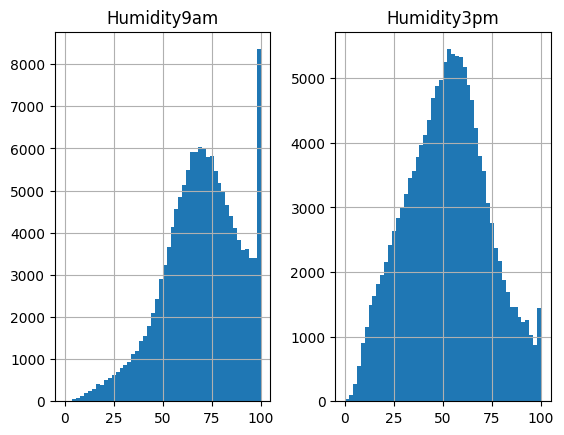

In [32]:
weather_df[HUMIDITY_VARS].hist(bins=50)

En ambos histogramas puede observarse una distribución asimétrica, acumulando muchos valores sobre el extremo derecho. Esto puede deberse a que pasado cierto umbral de medición, el instrumento devuelva siempre el valor máximo o un valor cercano (99% o 100%).
Además, se observa que la variable Humidity9am esta más sesgada a la derecha que la variable Humidity3pm, lo cual tiene sentido que ya que la humedad a las 9am suele ser mayor debido a que el día recién comienza.

##### Variables de presión

Las variables Pressure9am y Pressure3pm son variables cuantitativas continuas de razón que indican la presión a las 9am y a las 3pm respectivamente en hpa.

In [33]:
PRESSURE_VARS = ['Pressure9am', 'Pressure3pm']
weather_df[PRESSURE_VARS].describe()

,Pressure9am,Pressure3pm
count,130395.00000,130432.000000
mean,1017.64994,1015.255889
std,7.10653,7.037414
min,980.50000,977.100000
25%,1012.90000,1010.400000
50%,1017.60000,1015.200000
75%,1022.40000,1020.000000
max,1041.00000,1039.600000


Los rangos de las variables son coherentes con la presión atmosférica, la cual se mide en hpa. Aunque los valor minimos y máximos presentes generalmente estan asociados a condiciones climaticas fuera de lo común, los mismos son posibles.

array([[<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>]], dtype=object)

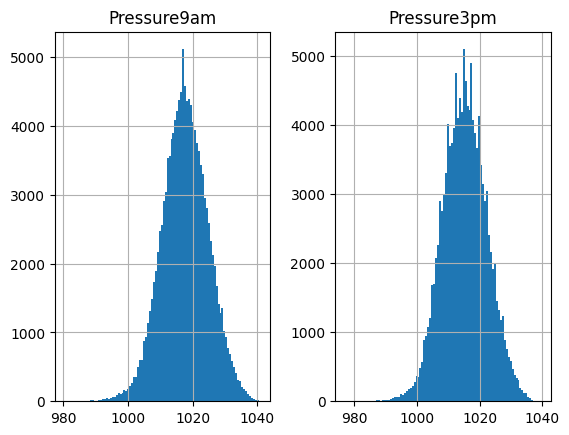

In [34]:
weather_df[PRESSURE_VARS].hist(bins=100)

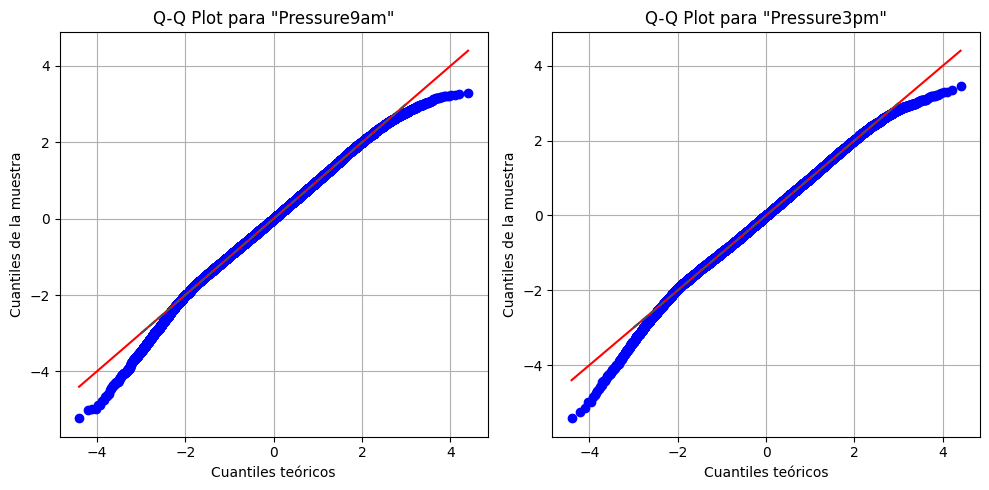

In [35]:
pressure_vars_standarized = (weather_df[PRESSURE_VARS] - weather_df[PRESSURE_VARS].mean())/weather_df[PRESSURE_VARS].std()
pressure_vars_standarized = pressure_vars_standarized.dropna()

# crear gráfico con 2 subgráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Iterar sobre las variables de temperatura y graficar el Q-Q plot en cada subgráfico
for i, var in enumerate(PRESSURE_VARS):
    ax = axes[i]
    stats.probplot(pressure_vars_standarized[var], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot para "{var}"')
    ax.set_xlabel('Cuantiles teóricos')
    ax.set_ylabel('Cuantiles de la muestra')
    ax.grid(True)
    ax.plot([-3, 3], [-3, 3], ls="--", c=".3")  # Agregar línea de referencia

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Tal como se puede apreciar en los histogramas como en los gráficos Q-Q, ambas variables presentan distribuciones que se asemejan bastante a la Normal, pero en los dos casos con colas pesadas a la izquierda.

##### Variables de nubosidad

Las variables Cloud9am y Cloud3pm son variables cuantitativas discretas de razón que indican la fracción del cielo cubierta por nubes a las 9am y a las 3pm respectivamente en oktas. Un 0 indica cielo despejado y un 8 cielo completamente cubierto.

In [36]:
CLOUD_VARS = ['Cloud9am', 'Cloud3pm']
weather_df[CLOUD_VARS].describe()

,Cloud9am,Cloud3pm
count,89572.000000,86102.000000
mean,4.447461,4.509930
std,2.887159,2.720357
min,0.000000,0.000000
25%,1.000000,2.000000
50%,5.000000,5.000000
75%,7.000000,7.000000
max,9.000000,9.000000


In [37]:
for var in CLOUD_VARS:
    print(f'Conteo de valores para {var}: {weather_df[var].value_counts()}')

Conteo de valores para Cloud9am: Cloud9am
7.0    19972
1.0    15687
8.0    14697
0.0     8642
6.0     8171
2.0     6500
3.0     5914
5.0     5567
4.0     4420
9.0        2
Name: count, dtype: int64
Conteo de valores para Cloud3pm: Cloud3pm
7.0    18229
1.0    14976
8.0    12660
6.0     8978
2.0     7226
3.0     6921
5.0     6815
4.0     5322
0.0     4974
9.0        1
Name: count, dtype: int64


Se puede observar que el rango de valores de ambas variables es de 0 a 8, pero se encuentran errores debido a que se registran valores mayores a 8. Esto puede deberse a errores de medición.

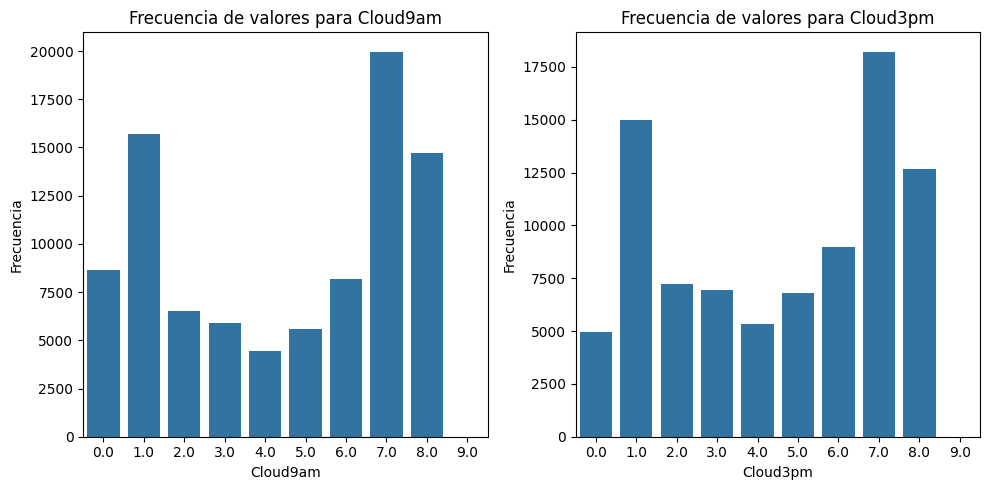

In [38]:
# crear un grafico con las frecuencia de las variables
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, var in enumerate(CLOUD_VARS):
    ax = axes[i]
    sns.countplot(data=weather_df, x=var, ax=ax)
    ax.set_title(f'Frecuencia de valores para {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Las frecuencias de valores son bastante similares para 9am y 3pm. Hay dos valores que predominan que son 1 y 7.

##### Variables de horas de sol

La variable Sunshine es una variable cuantitativa continua de razón que indica las horas de sol en el día.

In [39]:
weather_df['Sunshine'].describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

<Axes: >

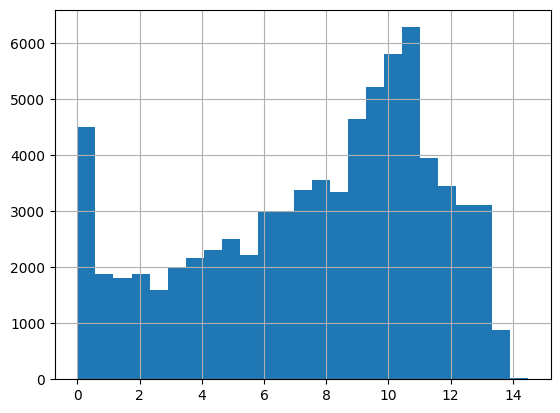

In [40]:
weather_df['Sunshine'].hist(bins=25)

Se puede observar que el rango de valores de la variable es de 0 a un valor cercano a las 15h, lo cual es correcto ya que las horas de sol no pueden ser negativas y por la ubicación geográfica de Australia, sería raro que se registren valores mayores a 15h.
Por otra parte se observa una gran cantidad de días con 0 horas de sol, lo cual puede deberse a condiciones climáticas como lluvias o tormentas. En cuanto a la distribución de los datos, se observa una distribución oblicua con una cola más pesada hacia la izquierda.

#### Categóricas

Las variables categóricas que se analizarán son las siguientes, agrupandolas en dos categorías para facilitar su análisis:
* **Variables de dirección del viento:** WindGustDir, WindDir9am, WindDir3pm.
* **Variables de ubicación:** Location.
* **Variables de fecha:** Date.
* **Variable de si llovió hoy:** RainToday.

##### Variables de dirección del viento

Las variables WindGustDir, WindDir9am y WindDir3pm son variables categóricas ordinales que indican la dirección del viento en los momentos de la ráfaga más fuerte, a las 9am y a las 3pm respectivamente. 

In [41]:
WIND_DIR_VARS = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

print('Valores únicos (WindGustDir): ',weather_df['WindGustDir'].unique())
print('Cardinalidad (WindGustDir): ', len(weather_df['WindGustDir'].unique()))
print('')
print('Valores únicos (WindDir9am): ',weather_df['WindDir9am'].unique())
print('Cardinalidad (WindDir9am): ', len(weather_df['WindDir9am'].unique()))
print('')
print('Valores únicos (WindDir3pm): ',weather_df['WindDir3pm'].unique())
print('Cardinalidad (WindDir3pm): ', len(weather_df['WindDir3pm'].unique()))

Valores únicos (WindGustDir):  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Cardinalidad (WindGustDir):  17

Valores únicos (WindDir9am):  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Cardinalidad (WindDir9am):  17

Valores únicos (WindDir3pm):  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Cardinalidad (WindDir3pm):  17


En estas variables se observa que los valores son categóricos y representan la dirección del viento. Se puede observar que la cardinalidad de las variables es de 17, aunque se cuenta con valores nulos. Esto indica que hay 16 posibles valores únicos para cada variable.
Dichos valores representan las direcciones de la rosa de los vientos, por lo que se consideran variables ordinales. Los mismos son:
- N: Norte
- NNE: Norte noreste
- NE: Noreste
- ENE: Este noreste
- E: Este
- ESE: Este sureste
- SE: Sureste
- SSE: Sur sureste
- S: Sur
- SSW: Sur suroeste
- SW: Suroeste
- WSW: Oeste suroeste
- W: Oeste
- WNW: Oeste noroeste
- NW: Noroeste
- NNW: Norte noroeste

Para codificar este tipo de variables se pueden utilizar diferentes métodos. 
Uno de los más comunes es el de One-Hot Encoding, el cual consiste en crear una columna por cada valor único de la variable y asignar un 1 si la observación corresponde a ese valor y un 0 en caso contrario. Dada la alta cardinalidad de las variables, se deberá tener en cuenta el impacto que esto puede tener en el rendimiento de los modelos.
Por otro lado, dada la naturaleza de la variable puede resultar útil utilizar una codificación circular, la cual consiste en asignar a cada valor un ángulo en un círculo unitario. De esta manera, se puede tener en cuenta la relación entre los valores de la variable.

##### Variables de ubicación

La variable Location es una variable cualitativa nominal que indica la ubicación de la estación meteorológica.

In [42]:
print('Valores únicos: ', weather_df['Location'].unique())
print('Cardinalidad: ', len(weather_df['Location'].unique()))

Valores únicos:  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Cardinalidad:  49


La variable no presenta errores ni valores faltantes, pero cuenta con un alta cardinalidad, ya que existen 49 ubicaciones diferentes. 

A continuación se gráfica la cantidad de localizaciones utilizadas a lo largo del tiempo.

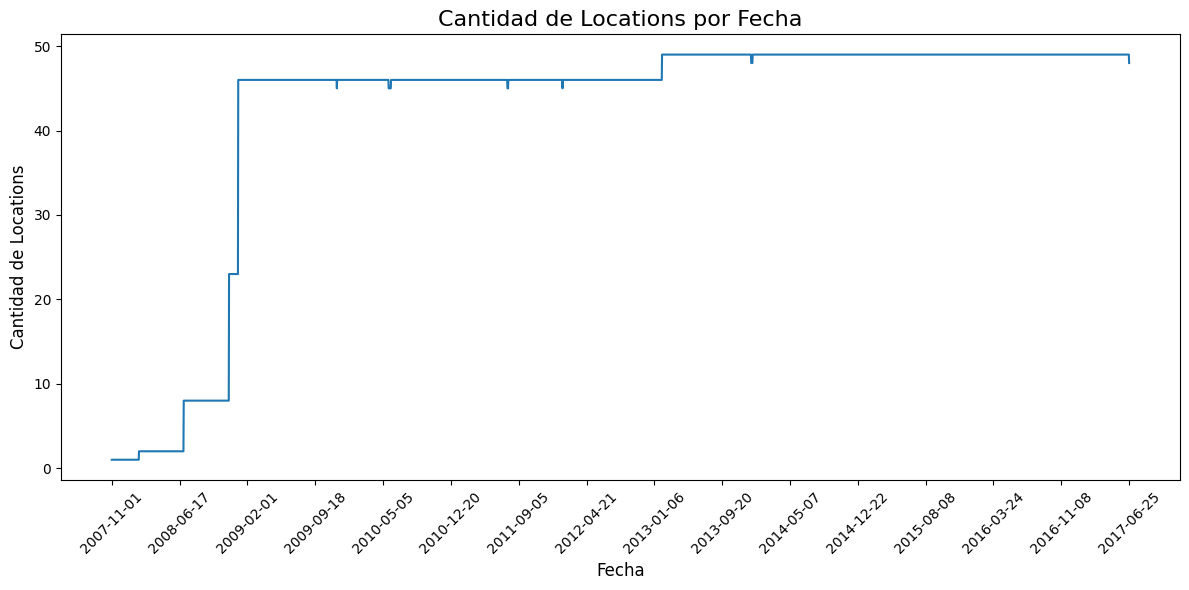

In [43]:
# Se agrupan las Locations por Date.
location_counts = weather_df.groupby('Date')['Location'].count().reset_index()
location_counts.columns = ['Date', 'LocationCount']

# Seleccionar solo un subconjunto de fechas para mostrar
num_dates = 15
dates_to_show = location_counts.iloc[::len(location_counts)//num_dates, :]

plt.figure(figsize=(12, 6))
sns.lineplot(data=location_counts, x='Date', y='LocationCount')
plt.title('Cantidad de Locations por Fecha', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de Locations', fontsize=12)

# Etiquetas del eje x
plt.xticks(ticks=dates_to_show.index, labels=dates_to_show['Date'], rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

En este gráfico se puede observar que en cada observación no necesariamente se tiene información de todas las estaciones meteorológicas (49 en total para el dataset). Esto puede deberse a diversos motivos, como por ejemplo que fueron creándose/habilitándose en el correr del tiempo, o bien hubo inhabilitaciones temporales de las mismas.

In [44]:
count_per_region = weather_df['Location'].value_counts()

# Calculo el porcentaje por region
percentage_par_region = (count_per_region / len(weather_df)) * 100
percentage_par_region

Location
Canberra            2.362161
Sydney              2.298914
Darwin              2.195105
Melbourne           2.195105
Brisbane            2.195105
Adelaide            2.195105
Perth               2.195105
Hobart              2.195105
Albany              2.089922
MountGambier        2.089922
Ballarat            2.089922
Townsville          2.089922
GoldCoast           2.089922
Cairns              2.089922
Launceston          2.089922
AliceSprings        2.089922
Bendigo             2.089922
Albury              2.089922
MountGinini         2.089922
Wollongong          2.089922
Newcastle           2.089234
Tuggeranong         2.089234
Penrith             2.089234
Woomera             2.068610
Nuriootpa           2.068610
Cobar               2.068610
CoffsHarbour        2.068610
Moree               2.068610
Sale                2.068610
PerthAirport        2.068610
PearceRAAF          2.068610
Witchcliffe         2.068610
BadgerysCreek       2.068610
Mildura             2.068610
Norfo

Algunas regiones tienen más información que las otras. Esto puede deberse a problemas como falta de estaciones meteorológicas, etc

Para la codificación de la variable de localizaciones se pueden aplicar diferentes métodos.
Uno de los más comunes es el de One-Hot Encoding, el cual consiste en crear una columna por cada valor único de la variable y asignar un 1 si la observación corresponde a ese valor y un 0 en caso contrario.

##### Variables de fecha

La variable Date es una variable cualitativa ordinal que indica la fecha de la observación. La misma se encuentra en formato de fecha, por lo que se deberá convertir a un formato adecuado para su análisis, como por ejemplo un objeto datetime. No incluye la hora de la observación.

In [45]:
# Se determina si existen duplicados por Date y por Date,Location (agrupados).

tiene_duplicados_date = len(weather_df[weather_df.duplicated(subset=['Date'], keep=False)]) > 0
print('¿Valores duplicados por variable Date?: ', 'Sí' if tiene_duplicados_date else 'No')

tiene_duplicados_date_location = len(weather_df[weather_df.duplicated(subset=['Date', 'Location'], keep=False)]) > 0
print('¿Valores duplicados por variables Date y Location?: ', 'Sí' if tiene_duplicados_date_location else 'No')

¿Valores duplicados por variable Date?:  Sí
¿Valores duplicados por variables Date y Location?:  No


El hecho de que no existan duplicados por Date y Location indica que dada una fecha se registra como máximo una observación por estación meteorológica, lo cual tiene sentido pero era necesario validarlo.

<Axes: >

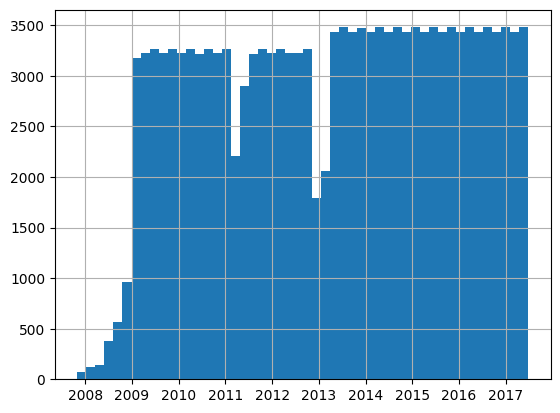

In [46]:
# Se genera un histograma para chequear la completitud de las fechas en el rango de observaciones

# Se convierte la variable Date de tipo "object" a "datetime" para poder realizar el histograma
date_to_datetime = pd.to_datetime(weather_df['Date'])

date_to_datetime.hist(bins=50)

En el histograma se pueden observar un par de alteraciones entre los años 2011 y 2013 que determinaremos si se corresponden con falta de observaciones en dichos períodos (también podrían ser fallas en algunas estaciones meteorológicas).

In [47]:
# En el rango definido por las fechas mínima y máxima, se imprimen aquellas fechas para las cuales no hay observaciones
print(pd.date_range(start=date_to_datetime.min(), end=date_to_datetime.max()).difference(date_to_datetime))

DatetimeIndex(['2011-04-01', '2011-04-02', '2011-04-03', '2011-04-04',
               '2011-04-05', '2011-04-06', '2011-04-07', '2011-04-08',
               '2011-04-09', '2011-04-10', '2011-04-11', '2011-04-12',
               '2011-04-13', '2011-04-14', '2011-04-15', '2011-04-16',
               '2011-04-17', '2011-04-18', '2011-04-19', '2011-04-20',
               '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24',
               '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28',
               '2011-04-29', '2011-04-30', '2012-12-01', '2012-12-02',
               '2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06',
               '2012-12-07', '2012-12-08', '2012-12-09', '2012-12-10',
               '2012-12-11', '2012-12-12', '2012-12-13', '2012-12-14',
               '2012-12-15', '2012-12-16', '2012-12-17', '2012-12-18',
               '2012-12-19', '2012-12-20', '2012-12-21', '2012-12-22',
               '2012-12-23', '2012-12-24', '2012-12-25', '2012-12-26',
      

Efectivamente, no hubo observaciones en abril de 2011, diciembre de 2012, ni febrero de 2013.

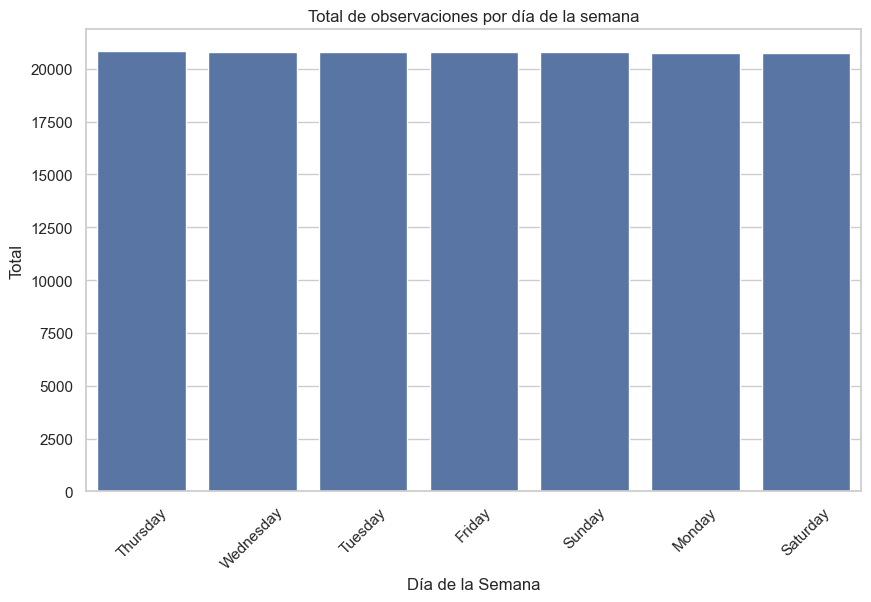

In [48]:
# Se grafica cómo se distribuyen las fechas en los días de la semana, para determinar si hay algún día en que no se registran.

week_day = date_to_datetime.dt.day_name()

day_counts = week_day.value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)

plt.title('Total de observaciones por día de la semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Total')
plt.xticks(rotation=45)

plt.show()

En el gráfico se puede observar que las observaciones están distribuidas uniformemente entre los días de la semana. Por lo tanto, se puede ver que ningún día se suspenden las observaciones.

Para la codificación de la variable de fecha se piensa subdividir en año, mes y día. 

##### Variables de si llovió hoy

La variable RainToday es una variable cualitativa nominal que indica si llovió hoy más de 1mm durante 24h hasta las 9am. 

In [49]:
weather_df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [50]:
weather_df['RainToday'].value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

Los valores posibles son "Yes" si llovió y "No" si no llovió. Se observan valores faltantes como en la mayoría de las variables.
La variable de RainToday presenta un desbalanceo en los datos, ya que la cantidad de registros con "No" es mayor a la cantidad de registros con "Yes".

Para la codificación de la variable se va a pasar a valores numéricos, asignando 1 a "Yes" y 0 a "No".

## Resumen de análisis exploratorio inicial

Se analizaron brevemente las distribuciones y algunas particularidades de las diferentes variables. Tenemos un conjunto de variables que pueden ser tratadas como de entrada al problema que en principio son: Location, MinTemp, MaxTemp, Temp9am, Temp3pm, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Pressure9am, Pressure3pm, Rainfall, Evaporation, Sunshine, Humidity9a, Humidity3pm, WindGustDir, WindDir9am, WindDir3pm, Cloud9am, Cloud3pm y RainToday. Notar que no se incluyó la variable Date porque tal como está definida no aporta información valiosa, tal vez se podría extraer de aquí el mes, la semana del año, o el día para tener información más genérica acerca del momento en que se realizó la observación y que no dependa del año.

La variable de salida es RainTomorrow y como se observó, además de estar desbalanceada, presenta valores nulos.

# Limpieza y preparación de datos e ingeniería de features

## Tratamiento de datos faltantes

A continuación se procede a realizar el tratamiento de los datos faltantes en el dataset. Realizando una imputación de los datos faltantes en función de la naturaleza de las variables, en caso de ser necesario.

### Análisis de datos faltantes

In [51]:
#carga de los datos
weather_original_df = pd.read_csv("./dataset/weatherAUS.csv")
weather_analisis_df = pd.read_csv("./dataset/weatherAUS.csv")

#cantidad de elementos en el dataset
print(weather_original_df.shape)

(145460, 23)


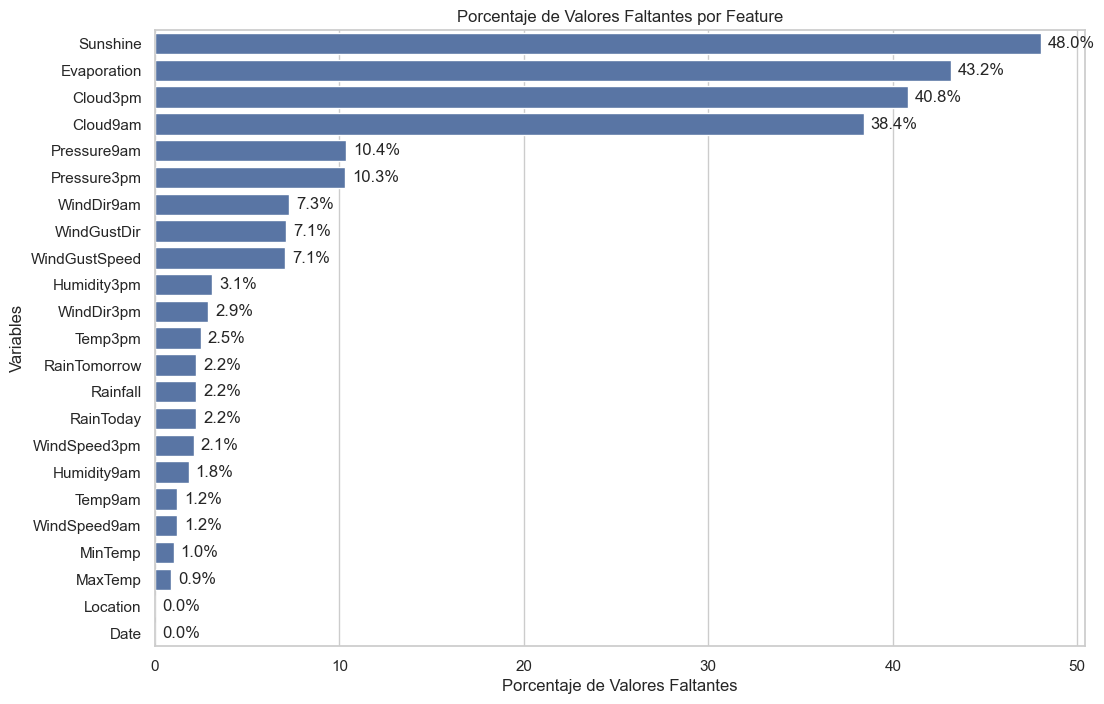

In [52]:
missing_values = weather_original_df.isna().sum()
missing_percentage = (missing_values / len(weather_original_df)) * 100
missing_data = pd.DataFrame({'Feature': missing_values.index, 'MissingPercentage': missing_percentage})
missing_data = missing_data.sort_values(by='MissingPercentage', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='MissingPercentage', y='Feature', data=missing_data)
plt.title('Porcentaje de Valores Faltantes por Feature')
plt.xlabel('Porcentaje de Valores Faltantes')
plt.ylabel('Variables')

# Añadir el porcentaje encima de cada barra
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=5)

plt.show()

<Axes: >

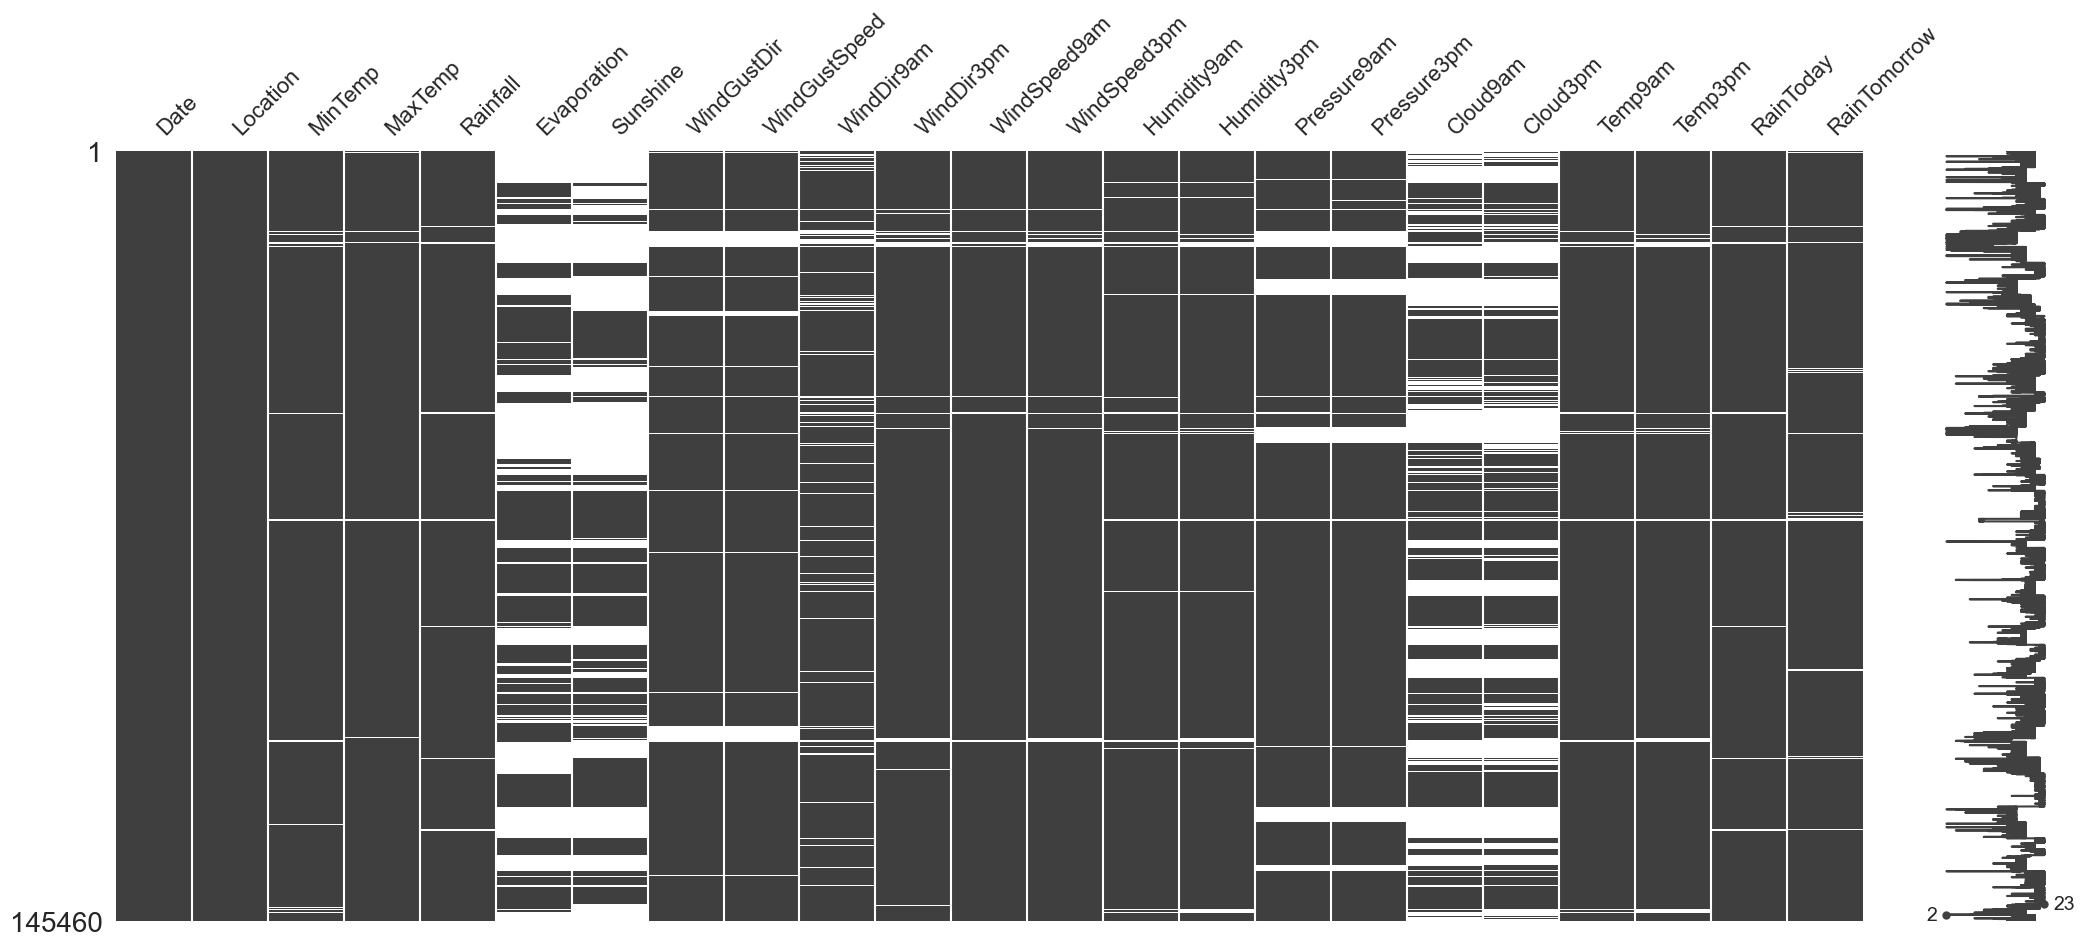

In [53]:
# relacion entreo los datos faltantes de las columnas
msno.matrix(weather_original_df)

La mayor parte de las variables numericas tienen un bajo porcentaje de valores perdidos y de la primera imagen podemos notar los siguiente porcentajes de prescencia de nulos:

- Sunshine:         %48.009762
- Evaporation:     %43.166506
- Cloud3pm:         %40.807095
- Cloud9am:         %38.421559
- Pressure9am:     %10.356799
- Pressure3pm:      %10.331363

Por otro lado las variables categoricas mas relevantes con perdidas de datos son:

- WindDir9am:      %7.263853
- WindGustDir:     %7.098859

<!-- De la segunda imagen se puede observer que hay epocas donde la falta de datos en general, es decir, prescencia de nulos en todo el registro. -->

A continuación se procede a realizar un análisis por ubicación de los datos faltantes en las variables debido a los descubrimientos en el análisis exploratorio.

In [54]:
# Análisis de valores faltantes por regiones
missing_data_percentage = weather_original_df.groupby('Location').apply(lambda x: x.isnull().mean() * 100)

# Función para aplicar colores de fondo condicionales
def conditional_bg_color(val):
    red = min(255, int(2.55 * val))
    green = min(255, int(2.55 * (100 - val)))
    return f'background-color: rgb({red}, {green}, 0); color: black;'

missing_data_percentage.style.applymap(conditional_bg_color)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17472\2061475097.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_data_percentage = weather_original_df.groupby('Location').apply(lambda x: x.isnull().mean() * 100)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_17472\2061475097.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  missing_data_percentage.style.applymap(conditional_bg_color)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,0.000000,0.000000,0.062637,0.093956,3.194488,46.633260,44.597557,0.814281,0.814281,8.581272,0.501096,0.156593,0.156593,0.156593,0.156593,0.250548,0.219230,100.000000,100.000000,0.156593,0.125274,3.194488,3.225806
Albany,0.000000,0.000000,2.072368,1.776316,0.789474,9.539474,17.105263,100.000000,100.000000,8.125000,25.756579,2.006579,24.111842,1.611842,23.552632,0.822368,0.822368,1.250000,23.388158,1.282895,23.421053,0.789474,0.789474
Albury,0.000000,0.000000,0.361842,0.361842,0.953947,100.000000,100.000000,1.052632,1.052632,17.269737,1.513158,0.296053,0.361842,0.296053,0.263158,0.164474,0.263158,57.598684,53.059211,0.296053,0.263158,0.953947,0.953947
AliceSprings,0.000000,0.000000,0.032895,0.065789,0.263158,7.072368,17.105263,1.677632,1.677632,7.565789,0.131579,0.065789,0.065789,0.098684,0.164474,0.032895,0.098684,10.986842,11.875000,0.000000,0.065789,0.263158,0.296053
BadgerysCreek,0.000000,0.000000,1.196411,0.963775,2.691924,100.000000,100.000000,2.525756,2.525756,14.456630,2.824859,1.628448,1.595214,1.794616,1.827850,5.583250,5.749418,100.000000,100.000000,1.362579,1.462280,2.691924,2.691924
Ballarat,0.000000,0.000000,0.032895,0.032895,0.394737,100.000000,100.000000,1.019737,1.019737,2.993421,0.592105,0.263158,0.131579,0.690789,0.230263,0.789474,0.855263,17.960526,34.473684,0.394737,0.197368,0.394737,0.394737
Bendigo,0.000000,0.000000,0.065789,0.164474,0.197368,61.019737,100.000000,1.348684,1.315789,8.026316,1.414474,0.131579,0.131579,0.230263,0.065789,0.493421,0.328947,31.842105,25.394737,0.098684,0.065789,0.197368,0.197368
Brisbane,0.000000,0.000000,0.281867,0.438459,1.002192,0.595052,1.534607,1.284059,1.284059,2.192296,1.064829,0.031319,0.250548,0.125274,0.469778,0.031319,0.250548,0.031319,0.062637,0.125274,0.469778,1.002192,1.002192
Cairns,0.000000,0.000000,0.032895,0.000000,1.710526,12.171053,15.657895,0.625000,0.592105,1.414474,0.131579,0.032895,0.032895,0.032895,0.000000,0.032895,0.000000,6.809211,7.565789,0.032895,0.000000,1.710526,1.710526


Observamos que los datos que faltan se concentran en regiones específicas, lo que sugiere que estas zonas pueden no estar equipadas con sensores o que los datos pueden no haber sido transmitidos para estas regiones en determinados momentos.

### Comprobación de duplicados

In [55]:
duplicated_rows = weather_original_df.duplicated()
duplicated_rows.sum()


0

Se puede observar que el dataset no contiene registros duplicados.

### Comprobaciones generales de los datos

La lógica de algunas columnas debe cumplir condiciones específicas. Por ejemplo: Si tenemos mediciones de lluvia, el flag que indica la prescencia de la misma debe ser positivo.

In [56]:
def check_raintoday_condition(df):
    condition = ((df['Rainfall'] > 1) & (df['RainToday'] == 'Yes')) | ((df['Rainfall'] <= 1) & (df['RainToday'] == 'No'))
    count_true = condition.sum()
    count_false = len(df) - count_true
    return count_true, count_false

count_true, count_false = check_raintoday_condition(weather_original_df)
print("Numero de filas que satisfacen la condicion:", count_true)
print("Numero de filas que no satisfacen la condicion:", count_false)

Numero de filas que satisfacen la condicion: 142199
Numero de filas que no satisfacen la condicion: 3261


In [57]:
condition = ((weather_original_df['Rainfall'] > 1) & (weather_original_df['RainToday'] == 'Yes')) | ((weather_original_df['Rainfall'] <= 1) & (weather_original_df['RainToday'] == 'No'))
print(weather_original_df[~condition]["RainToday"].value_counts())
print(weather_original_df[~condition]["Rainfall"].value_counts())

Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


Vemos que los casos que no cumplen la condición son los que presentan nulos para ambos features. A estos casos se les aplicará un método de imputación.

### Imputación de datos faltantes

Podemos aplicar lo siguiente:
- Eliminación de Filas/Columnas: Útil cuando el porcentaje de datos faltantes es bajo.
- Imputación Simple:
    - Media/Mediana/Moda: Rellenar valores faltantes con la media, mediana o moda.
    - Valores Fijos: Usar un valor fijo o un valor de referencia.

- Imputación Avanzada:
    - KNN (K-Nearest Neighbors): Usa la similitud entre observaciones para imputar valores.
    - Regresión: Predice los valores faltantes utilizando otras variables.
    - Imputación Múltiple: Realiza múltiples imputaciones y promedia los resultados.

#### Imputación features categóricos

Vamos a proceder al uso del estadístico "moda" agrupando por la combinación Location y Month para calcular esta agregación. 

In [58]:
# Creación de la variable Month
weather_original_df["Date"] = pd.to_datetime(weather_original_df['Date'])
weather_original_df['Month'] = weather_original_df['Date'].dt.month

categorical_cols = weather_original_df.select_dtypes(include=['object']).columns.tolist() 

In [59]:
region_montly_mode = weather_original_df.groupby(['Month', 'Location'])[categorical_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
# Rellenar valores faltantes para columnas categóricas
weather_original_df[categorical_cols] = weather_original_df.apply(
        lambda row: pd.Series(
            [region_montly_mode.loc[(row['Month'], row['Location']), col] if pd.isna(row[col]) else row[col] for col in categorical_cols],
            index=categorical_cols
        ),
        axis=1
    )

In [60]:
categorical_var_null = weather_original_df.select_dtypes(include=['object']).isnull().mean() * 100
# weather_original_df.select_dtypes(include=['object']).isna().sum() # cantidad
print("Porcentaje de valores nulos para variables categoricas:\n",categorical_var_null)

Porcentaje de valores nulos para variables categoricas:
 Location        0.000000
WindGustDir     4.179156
WindDir9am      0.000000
WindDir3pm      0.000000
RainToday       0.000000
RainTomorrow    0.000000
dtype: float64


In [61]:
region_montly_mode[region_montly_mode["WindGustDir"].isna()]

Location WindGustDir WindDir9am WindDir3pm RainToday  \
Month Location                                                           
1     Albany        Albany        None         SE        ESE        No   
      Newcastle  Newcastle        None         NE         SE        No   
2     Albany        Albany        None          E        ESE        No   
      Newcastle  Newcastle        None         SE         SE        No   
3     Albany        Albany        None          E         SE        No   
      Newcastle  Newcastle        None         SE         SE        No   
4     Albany        Albany        None         NW        ESE        No   
      Newcastle  Newcastle        None         NW         SE        No   
5     Albany        Albany        None        NNW        ESE        No   
      Newcastle  Newcastle        None         NW         SE        No   
6     Albany        Albany        None        NNW         NW        No   
      Newcastle  Newcastle        None         NW         NW        No   
7     Albany        Albany        None          N        NNW        No   
      Newcastle  Newcastle        None         NW         NW        No   
8     Albany        Albany        None         NW         NW        No   
      Newcastle  Newcastle        None         NW         NW        No   
9     Albany        Albany        None         NW        WSW        No   
      Newcastle  Newcastle        None         NW         SE        No   
10    Albany        Albany        None         NW        WSW        No   
      Newcastle  Newcastle        None         NW         SE        No   
11    Albany        Albany        None        WSW        WSW        No   
      Newcastle  Newcastle        None         SE         SE        No   
12    Albany        Albany        None         SW        ESE        No   
      Newcastle  Newcastle        None         SE         SE        No   

                RainTomorrow  
Month Location                
1     Albany              No  
      Newcastle           No  
2     Albany              No  
      Newcastle           No  
3     Albany              No  
      Newcastle           No  
4     Albany              No  
      Newcastle           No  
5     Albany              No  
      Newcastle           No  
6     Albany              No  
      Newcastle           No  
7     Albany              No  
      Newcastle           No  
8     Albany              No  
      Newcastle           No  
9     Albany              No  
      Newcastle           No  
10    Albany              No  
      Newcastle           No  
11    Albany              No  
      Newcastle           No  
12    Albany              No  
      Newcastle           No

Vemos que hubo unas combinaciones de Month-Location donde la mode fueron valores nulos para el feature WindGustDir. Se ajusta la funcion de imputacion para ese caso. Se procede a calcular la moda a nivel Month simplemente para estos casos.

In [62]:
monthly_mode_windgustdir = weather_original_df.groupby('Month')['WindGustDir'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

def fill_missing_windgustdir_specific_locations(row):
    locations = ["Newcastle", "Albany"]
    if row['Location'] in locations and pd.isna(row['WindGustDir']):
        return monthly_mode_windgustdir.loc[row['Month']]
    else:
        return row['WindGustDir']

weather_original_df['WindGustDir'] = weather_original_df.apply(fill_missing_windgustdir_specific_locations, axis=1)


In [63]:
categorical_var_null = weather_original_df.select_dtypes(include=['object']).isnull().mean() * 100
# weather_original_df.select_dtypes(include=['object']).isna().sum() # cantidad
print("Porcentaje de valores nulos para variables categoricas:\n",categorical_var_null)

Porcentaje de valores nulos para variables categoricas:
 Location        0.0
WindGustDir     0.0
WindDir9am      0.0
WindDir3pm      0.0
RainToday       0.0
RainTomorrow    0.0
dtype: float64


#### Imputación features numéricos

En este caso vamos a utilizar la misma agrupación pero con calculando la mediana por tratarse de feature numéricos ya que evitamos el sesgo por outliers.

In [64]:
numerical_cols = weather_original_df.select_dtypes(include=['float64']).columns.tolist() # agregamos el mes (unico feature int32)

region_montly_mode = weather_original_df.groupby(['Month', 'Location'])[numerical_cols].median()
region_montly_mode.fillna(region_montly_mode.median().iloc[0], inplace=True)


In [65]:
# Rellenar valores faltantes para columnas numericas
weather_original_df[numerical_cols] = weather_original_df.apply(
    lambda row: pd.Series(
        [region_montly_mode.loc[(row['Month'], row['Location']), col] if pd.isna(row[col]) else row[col] for col in numerical_cols],
        index=numerical_cols
    ),
    axis=1
)

In [66]:
numerical_var_null = weather_original_df.select_dtypes(include=['float64']).isnull().mean() * 100
# weather_original_df.select_dtypes(include=['object']).isna().sum() # cantidad
print("Porcentaje de valores nulos para variables categoricas:\n",numerical_var_null)

Porcentaje de valores nulos para variables categoricas:
 MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
dtype: float64


In [67]:
# drop de month ya que se define en la codificacion
weather_original_df.drop(columns=["Month"],inplace=True)

## Códificación de variables categóricas

#### Codificacion Date

In [68]:
weather_original_df["Date"] = pd.to_datetime(weather_original_df['Date'])
weather_original_df['Year'] = weather_original_df['Date'].dt.year
weather_original_df['Month'] = weather_original_df['Date'].dt.month
weather_original_df['Day'] = weather_original_df['Date'].dt.day

In [69]:
weather_original_df.drop(columns='Date',inplace=True)

#### Codificacion RainTomorrow y RainToday

In [70]:
weather_original_df["RainToday"] = weather_original_df["RainToday"].apply(lambda x: 1 if x == "Yes" else 0)
weather_original_df["RainTomorrow"] = weather_original_df["RainTomorrow"].apply(lambda x: 1 if x == "Yes" else 0)

#### Codificacion Location

In [71]:
weather_original_df = pd.get_dummies(weather_original_df, columns=['Location'], dummy_na=True, drop_first=True)
display(weather_original_df.iloc[:,-49:].head(5))

,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,Location_nan
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Codificacion WindGustDir, WindDir9am y WindDir3pm

In [72]:
weather_original_df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

Dada la naturaleza circular de las direcciones del viento, no parece conveniente utilizar una técnica que establezca un orden lineal entre las mismas, dado que en cierto punto sucedería que dos direcciones similares terminen muy alejadas.

Por ejemplo, si codificamos partiendo desde N (Norte) en sentido horario quedaría:

N: 1, NNE: 2, NE: 3, ENE: 4, E: 5, ESE: 6, SE: 7, SSE: 8, S: 9, SSW: 10, SW: 11, WSW: 12, W: 13, WNW: 14, NW: 15, NNW: 16

Se presenta aquí el problema de que, por ejemplo, NNW (valor 16) y N (valor 1) están muy alejados pese a que en la realidad son direcciones cercanas.

Una alternativa es utilizar una codificación circular de la siguiente manera:

1. Asignar a cada punto cardinal un ángulo.
2. Crear dos nuevas columnas (eliminando la original) que indiquen el seno y el coseno de dicho ángulo.

De esta forma, este par de valores será similar para direcciones cercanas y más alejado para direcciones opuestas o ángulos rectos.

| Dirección | Ángulo (grados) | Ángulo (radianes) | Seno  | Coseno |
|-----------|-----------------|-------------------|-------|--------|
| N         | 0               | 0                 | 0.00  | 1.00   |
| NNE       | 22.5            | 0.392699081698724 | 0.38  | 0.92   |
| NE        | 45              | 0.785398163397448 | 0.71  | 0.71   |
| ENE       | 67.5            | 1.17809724509617  | 0.92  | 0.38   |
| E         | 90              | 1.5707963267949   | 1.00  | 0.00   |
| ESE       | 112.5           | 1.96349540849362  | 0.92  | -0.38  |
| SE        | 135             | 2.35619449019234  | 0.71  | -0.71  |
| SSE       | 157.5           | 2.74889357189107  | 0.38  | -0.92  |
| S         | 180             | 3.14159265358979  | 0.00  | -1.00  |
| SSW       | 202.5           | 3.53429173528852  | -0.38 | -0.92  |
| SW        | 225             | 3.92699081698724  | -0.71 | -0.71  |
| WSW       | 247             | 4.31096325242599  | -0.92 | -0.39  |
| W         | 270             | 4.71238898038469  | -1.00 | 0.00   |
| WNW       | 292.5           | 5.10508806208341  | -0.92 | 0.38   |
| NW        | 315             | 5.49778714378214  | -0.71 | 0.71   |
| NNW       | 337.5           | 5.89048622548086  | -0.38 | 0.92   |

In [73]:
direccion_to_angulo = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5,
    'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

def codificacion_wind_dir(df, columna, direccion_to_angulo):
    # Se obtienen los ángulos a partir del mapeo
    angulos = df[columna].map(direccion_to_angulo)

    # Se convierten los ángulos a radianes
    angulos_rad = np.deg2rad(angulos)

    # Se crean las nuevas columnas con el seno y el coseno
    df[f'{columna}_sin'] = np.sin(angulos_rad)
    df[f'{columna}_cos'] = np.cos(angulos_rad)

    # Se setea NaN en las nuevas columnas para aquellas direcciones que sean nulas.
    df.loc[df[columna].isna(), [f'{columna}_sin', f'{columna}_cos']] = np.nan

    # Se elimina la columna original
    del df[columna]
    #return df

codificacion_wind_dir(weather_original_df, 'WindGustDir', direccion_to_angulo)
codificacion_wind_dir(weather_original_df, 'WindDir9am', direccion_to_angulo)
codificacion_wind_dir(weather_original_df, 'WindDir3pm', direccion_to_angulo)

In [74]:
display(weather_original_df.iloc[:,-6:].head(5))

,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01


## Análisis de relaciones entre variables y selección de variables más importantes

Como se vio en el gráfico de la matriz de covarianza, existe una gran correlación entre features. Especialmente en los features de temperatura. Para ver la importancia que van a tener estas variables en los modelos, proponemos un feature selector basado en árboles de desición utilizando la librería XGBoost y Sklearn. 

Para este "modelo" selector vamos a trabajar con una muestra mucho más acotada que un set de entrenamiento convencional para un modelo productivo.

### Técnica 1

In [75]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel

In [76]:
df_sample = weather_original_df.sample(n=10000, axis=0)
df_sample.dropna(how='any',inplace=True)
df_sample.shape

(10000, 76)

Vemos que el dropna(how='any') no elimina ninguna fila, por ende los registros se encuentran imputados sin prescencia de nulos.

In [77]:
model_target = "RainTomorrow"
y = df_sample[model_target]
X = df_sample.drop(columns = model_target)

In [78]:
# primer arbol selector de 50 features importantes de un total de 76
selector = SelectFromModel(estimator=xgb.XGBClassifier(),max_features=50)
selector.fit(X, y)
relevant_features = list(selector.get_feature_names_out())

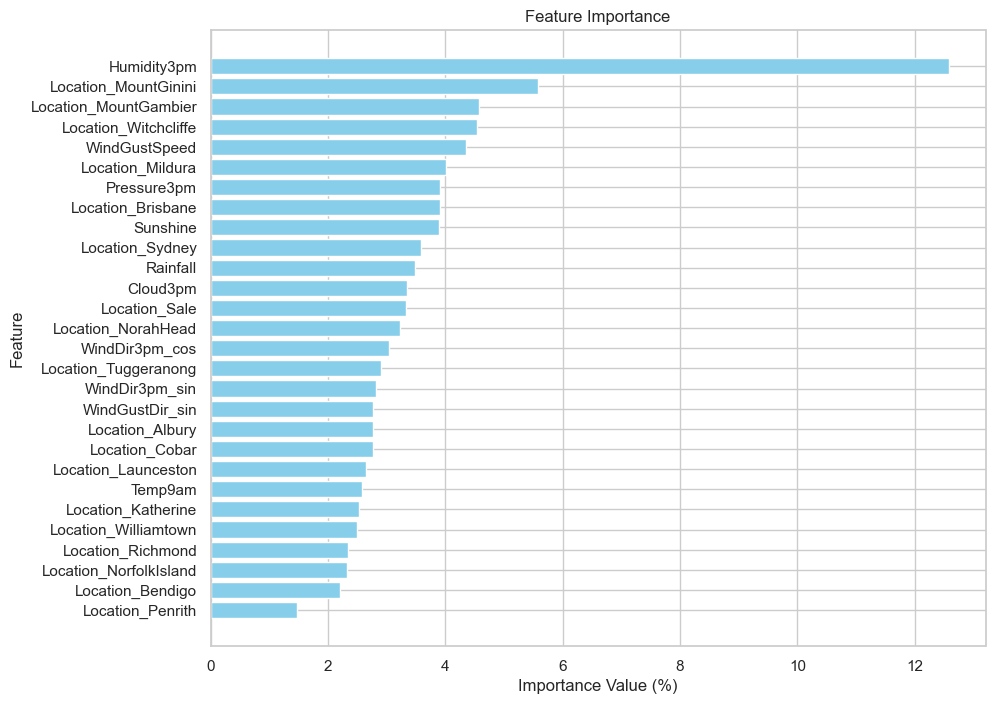

In [79]:
# estimador de feature importance
estimator = xgb.XGBClassifier()
estimator.fit(X[relevant_features], y)
feature_imp = pd.DataFrame(sorted(zip(estimator.feature_importances_,X[relevant_features].columns)), columns=['Value','Feature'])

#feature_imp.sort_values(by="Value", ascending=False)

# gráfico de barras horizontales
plt.figure(figsize=(10, 8)) 
plt.barh(feature_imp['Feature'], feature_imp['Value']*100, color='skyblue')  

# Añadir etiquetas y título
plt.xlabel('Importance Value (%)')  
plt.ylabel('Feature')         
plt.title('Feature Importance')

# Mostrar el gráfico
plt.show()

Se puede observar una aproximación a las features mas improtantes que va a usar un modelo, en especial si modelamos una clasificación mediante un arbol desición.

### Técnica 2

Visualizando la distribuciones generadas por cada feature en funcion del target. El objetivo es ver si algun feature logra discriminar en gran medida al target.

Vamos a imprimir los feature en grupos de 15 features.

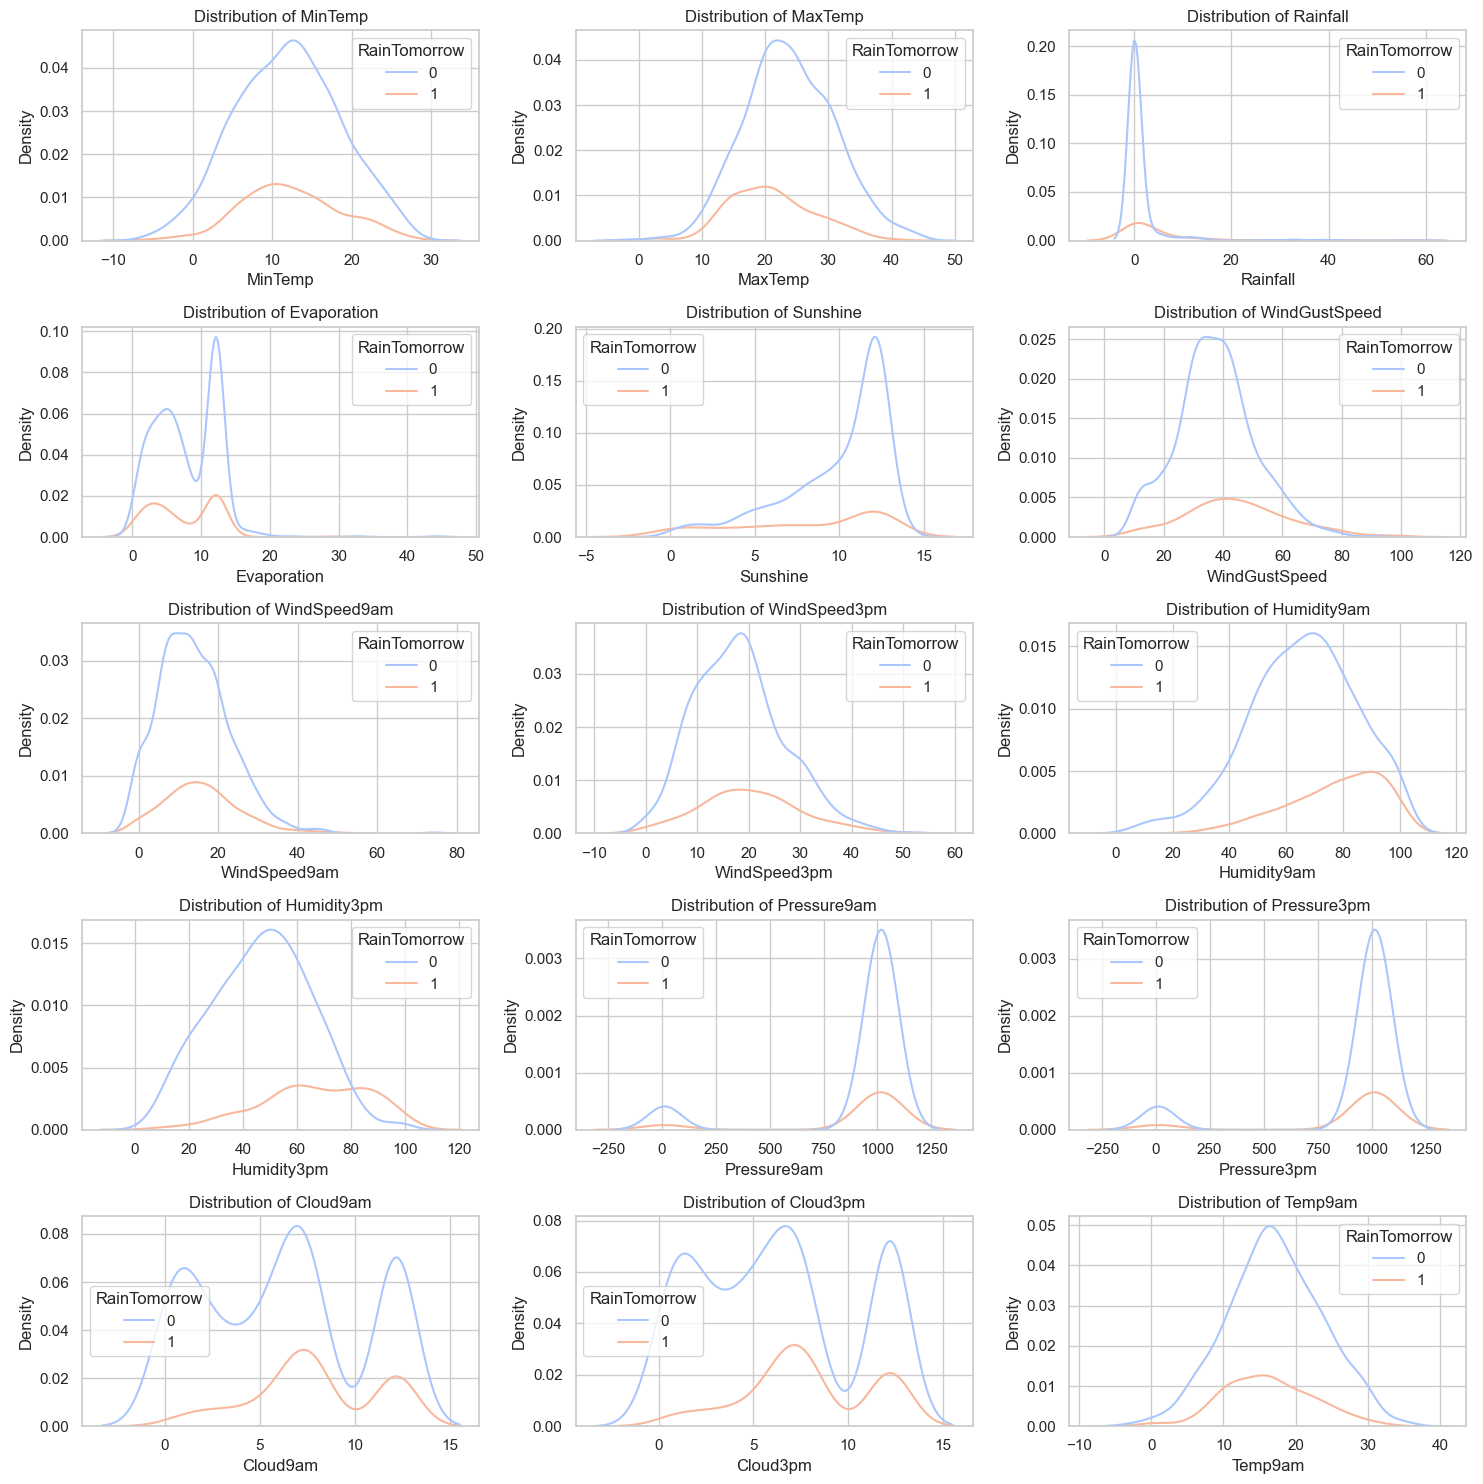

In [80]:
# Sample the data
sampled_data = weather_original_df.sample(1000)

# Define the variables of interest
variables_of_interest = weather_original_df.columns[0:15].to_list()

# Create a figure with 4 rows and 2 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the list of variables and corresponding axes
for ax, var in zip(axes, variables_of_interest):
    sns.kdeplot(data=sampled_data, x=var, hue='RainTomorrow', palette='coolwarm', ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {var}')

# Remove any unused axes
for ax in axes[len(variables_of_interest):]:
    fig.delaxes(ax)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Se destaca el feature **Humidity3pm**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17472\414199484.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=sampled_data, x=var, hue='RainTomorrow', palette='coolwarm', ax=ax)


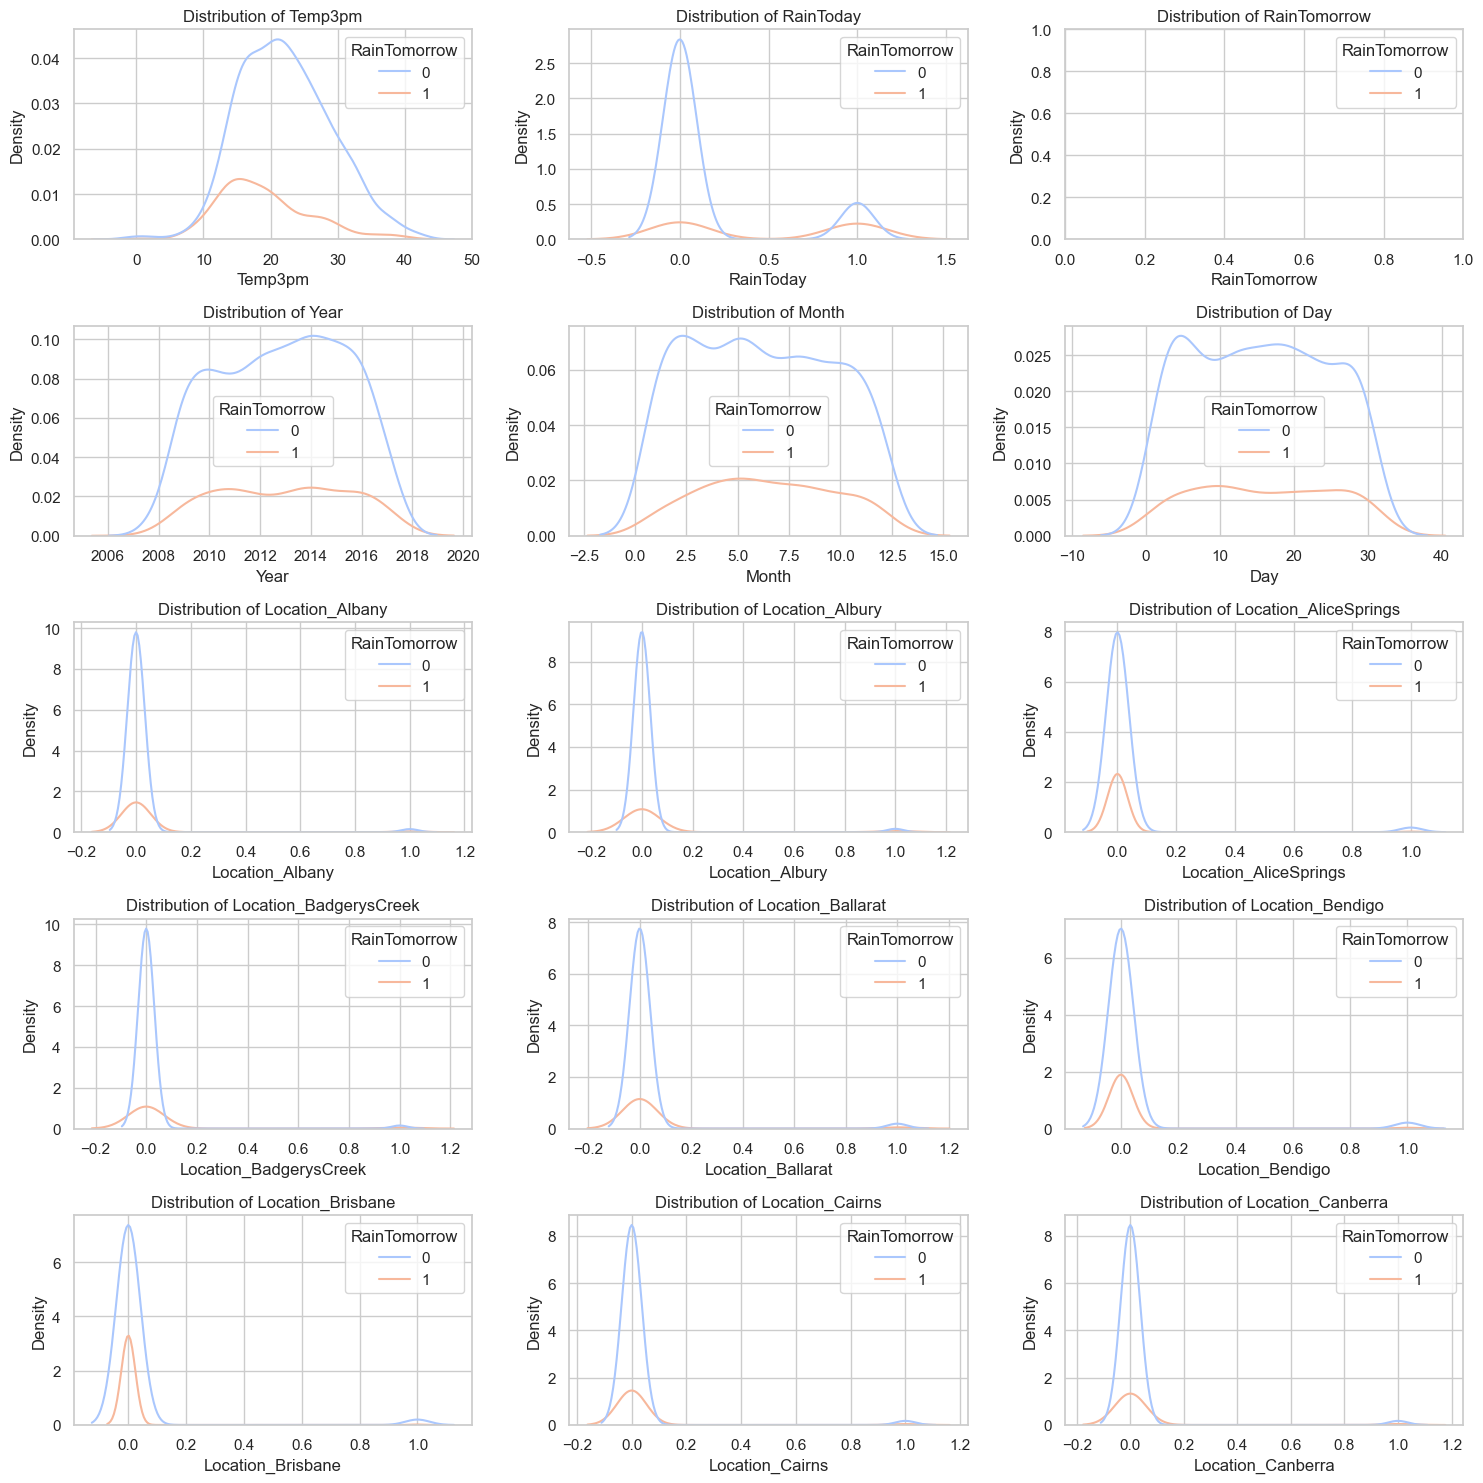

In [81]:
# Sample the data
sampled_data = weather_original_df.sample(1000)

# Define the variables of interest
variables_of_interest = weather_original_df.columns[15:30].to_list()

# Create a figure with 4 rows and 2 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the list of variables and corresponding axes
for ax, var in zip(axes, variables_of_interest):
    sns.kdeplot(data=sampled_data, x=var, hue='RainTomorrow', palette='coolwarm', ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {var}')

# Remove any unused axes
for ax in axes[len(variables_of_interest):]:
    fig.delaxes(ax)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


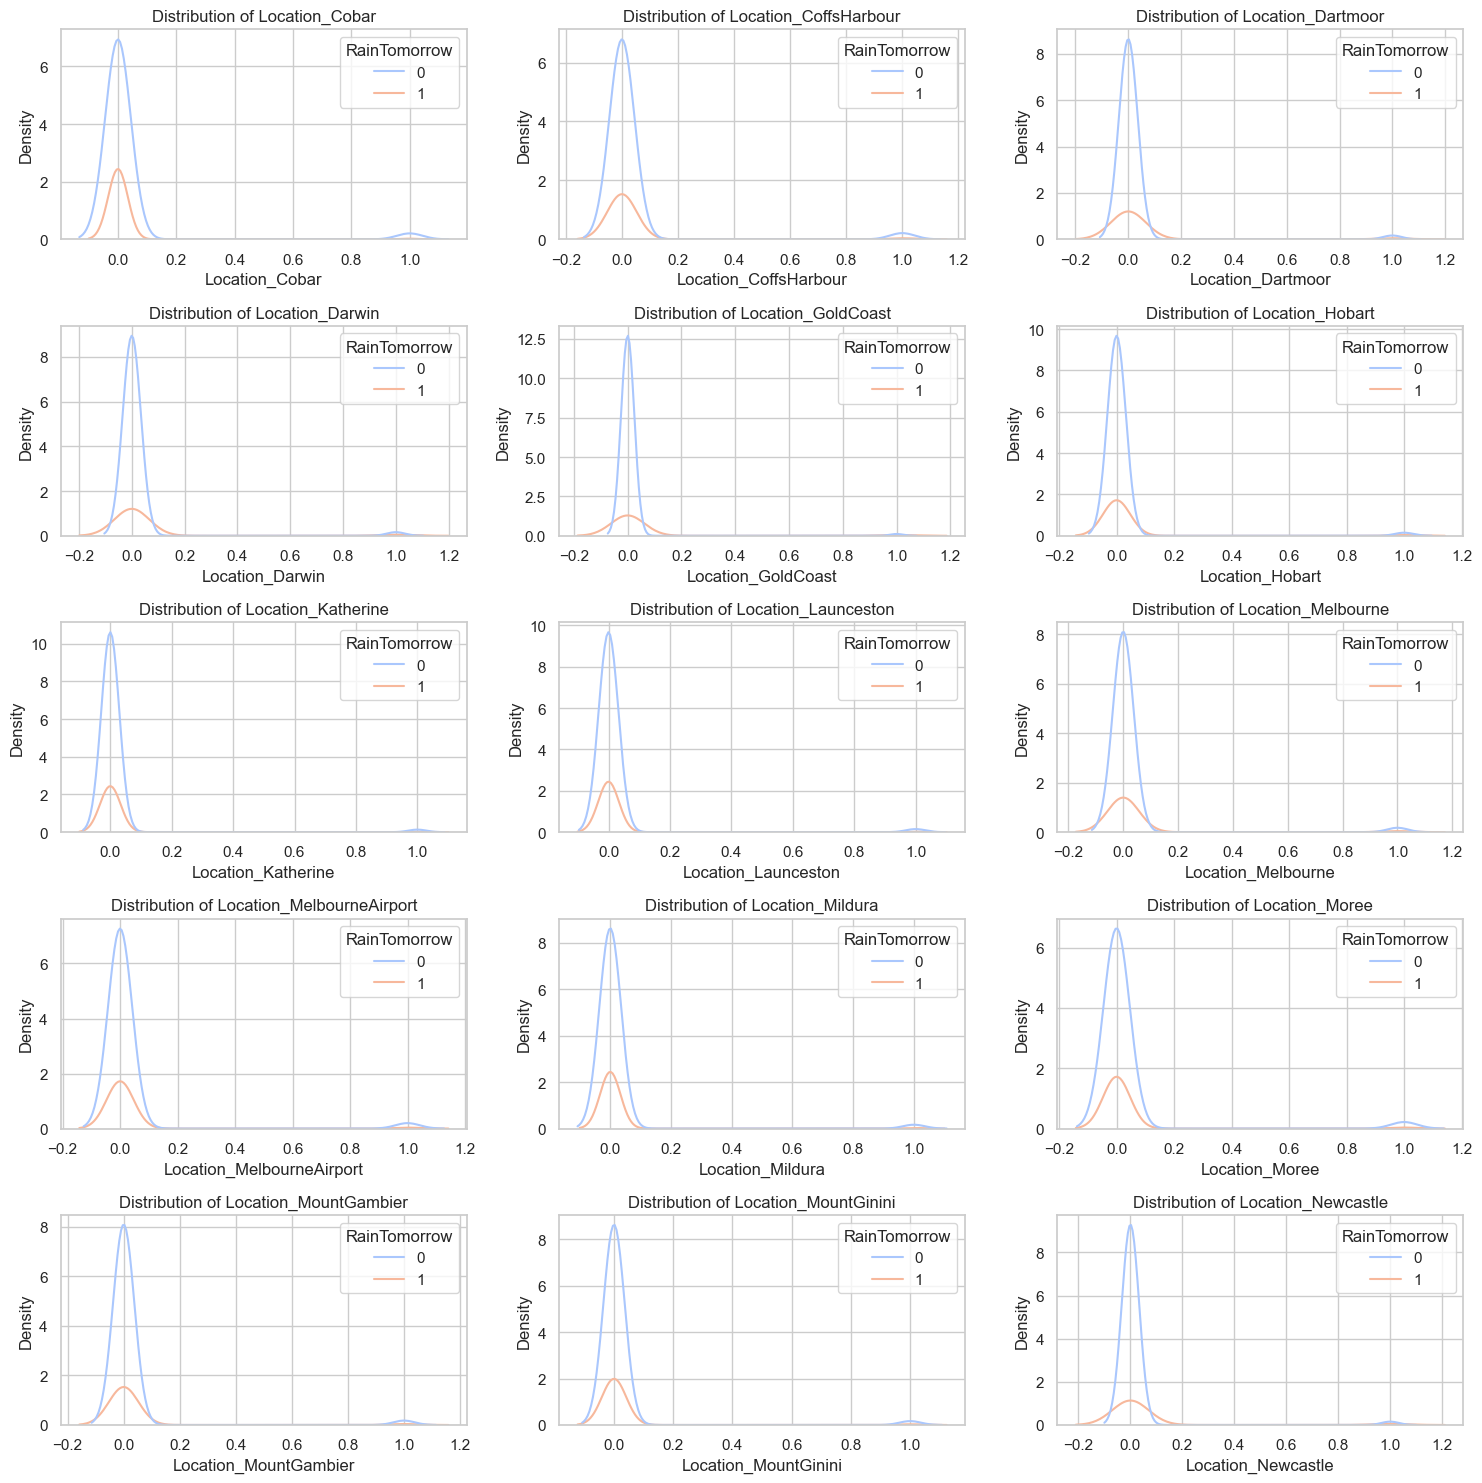

In [82]:
# Sample the data
sampled_data = weather_original_df.sample(1000)

# Define the variables of interest
variables_of_interest = weather_original_df.columns[30:45].to_list()

# Create a figure with 4 rows and 2 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the list of variables and corresponding axes
for ax, var in zip(axes, variables_of_interest):
    sns.kdeplot(data=sampled_data, x=var, hue='RainTomorrow', palette='coolwarm', ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {var}')

# Remove any unused axes
for ax in axes[len(variables_of_interest):]:
    fig.delaxes(ax)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


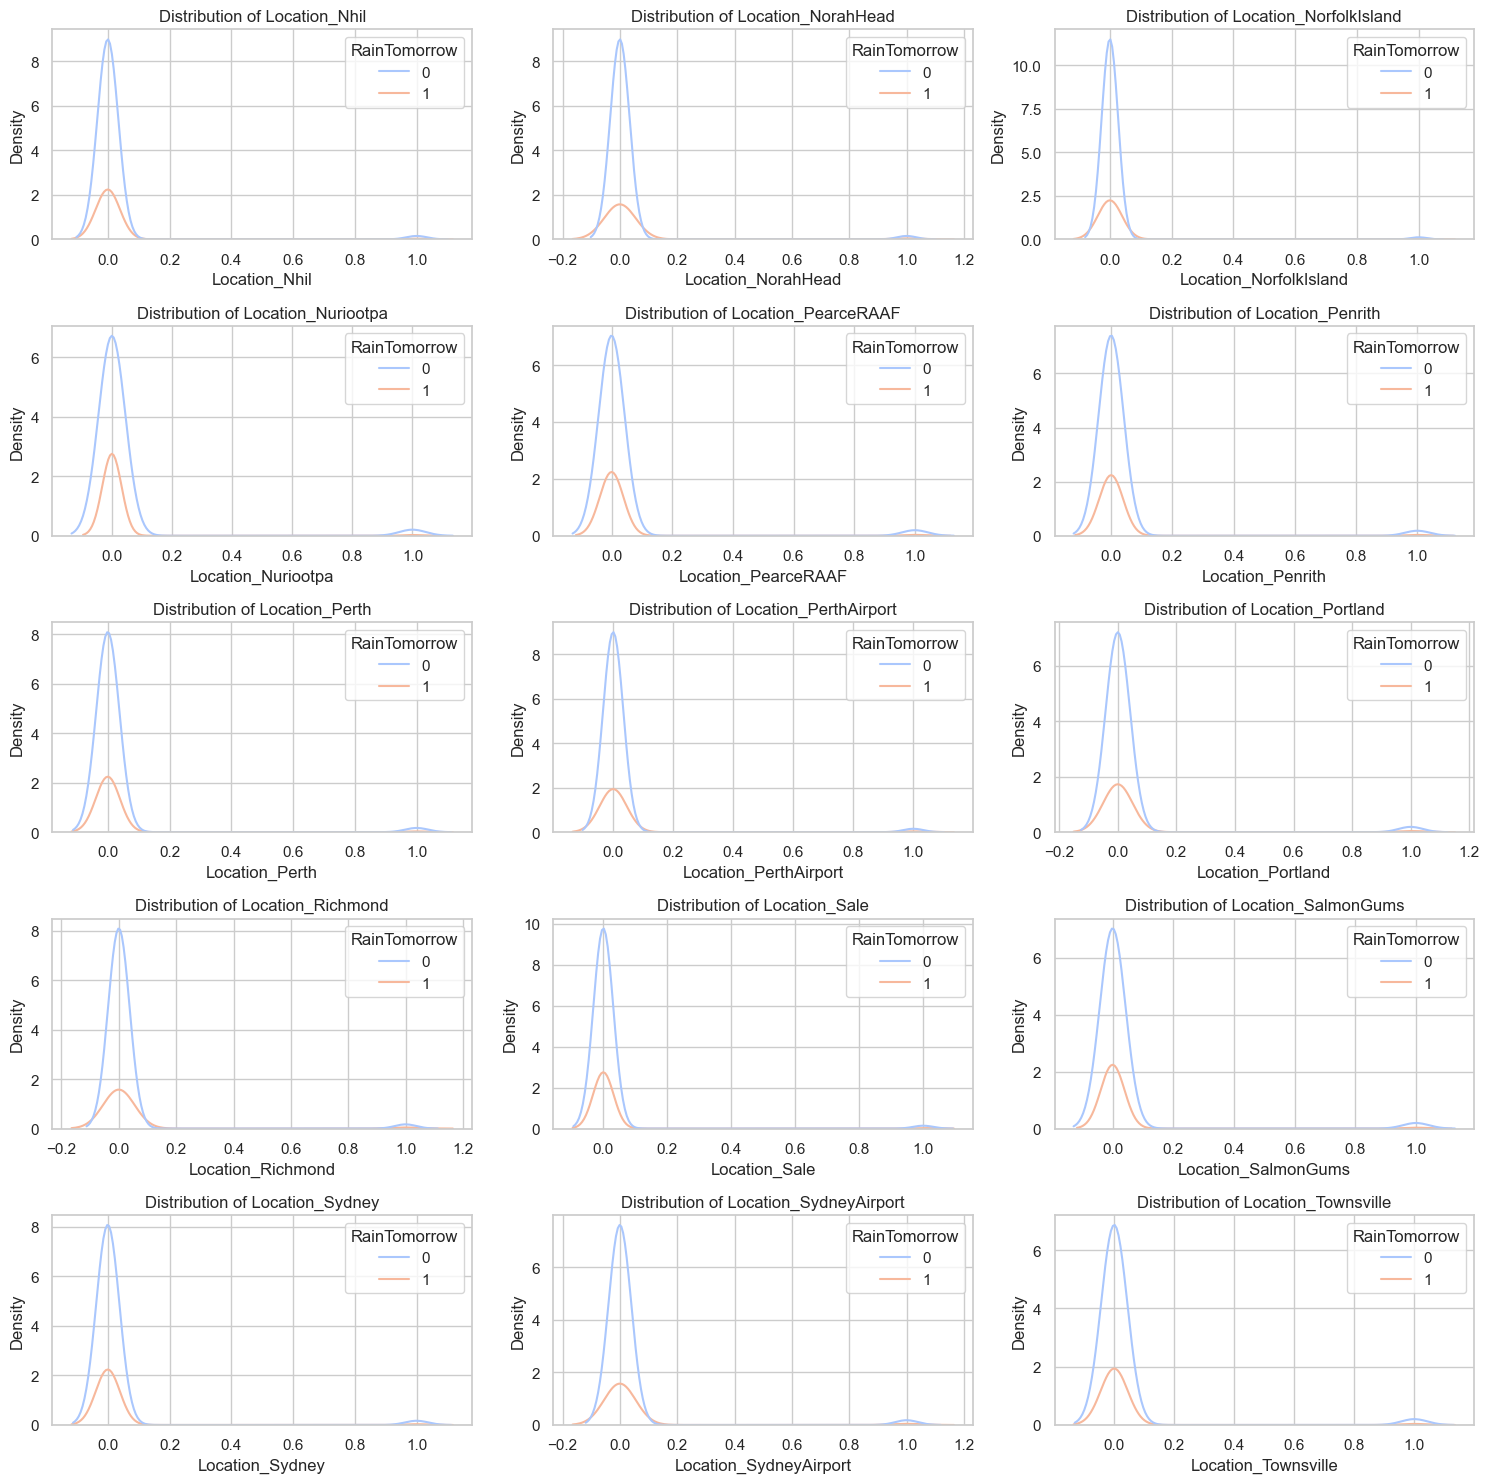

In [83]:
# Sample the data
sampled_data = weather_original_df.sample(1000)

# Define the variables of interest
variables_of_interest = weather_original_df.columns[45:60].to_list()

# Create a figure with 4 rows and 2 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the list of variables and corresponding axes
for ax, var in zip(axes, variables_of_interest):
    sns.kdeplot(data=sampled_data, x=var, hue='RainTomorrow', palette='coolwarm', ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {var}')

# Remove any unused axes
for ax in axes[len(variables_of_interest):]:
    fig.delaxes(ax)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_17472\2292513240.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=sampled_data, x=var, hue='RainTomorrow', palette='coolwarm', ax=ax)


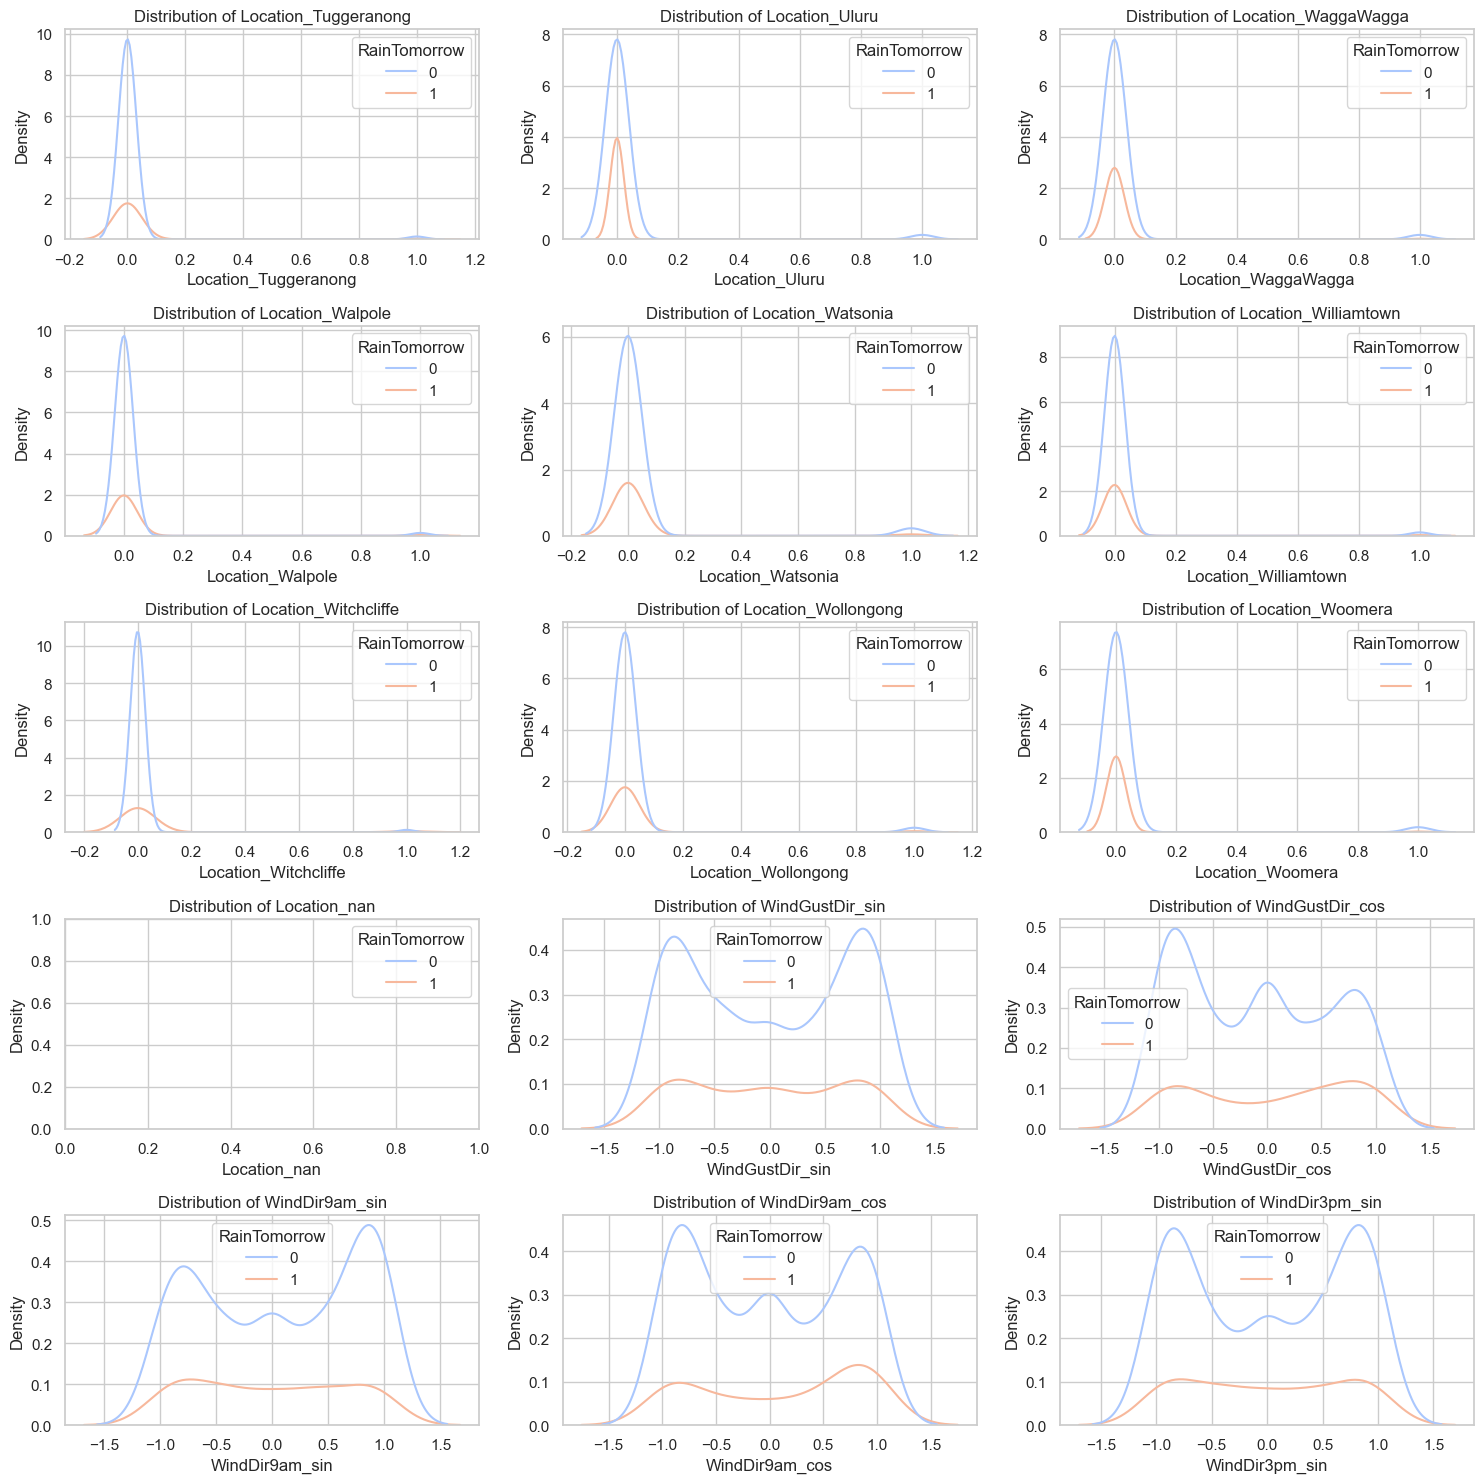

In [84]:
# Sample the data
sampled_data = weather_original_df.sample(1000)

# Define the variables of interest
variables_of_interest = weather_original_df.columns[60:75].to_list()

# Create a figure with 4 rows and 2 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the list of variables and corresponding axes
for ax, var in zip(axes, variables_of_interest):
    sns.kdeplot(data=sampled_data, x=var, hue='RainTomorrow', palette='coolwarm', ax=ax)
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {var}')

# Remove any unused axes
for ax in axes[len(variables_of_interest):]:
    fig.delaxes(ax)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


El único feature visible que aportó información fue **Humidity3pm**. Esto coincide con el feature más importante conseguido con el feature selector armado con XGBoost.

# Entrenamiento del modelo

## Baseline

In [85]:
from sklearn.model_selection import train_test_split

# Se separa el target del resto de las features
X = weather_original_df.drop(columns='RainTomorrow')
y = weather_original_df['RainTomorrow']

# Se separa el conjunto de entrenamiento y testeo en 70% y 30% respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

# Opción 1 de baseline: Predice siempre que no va a llover
rain_tomorrow_freq = y_test.value_counts(normalize=True)
y_pred_baseline1_test = rain_tomorrow_freq.idxmax()
y_pred_baseline1_test = np.array([y_pred_baseline1_test] * len(y_test))

# Opción 2 de baseline: Predice que si va a llover o no asumiendo que pasará lo mismo que hoy. 
y_pred_baseline2_test = X_test['RainToday']

# Se calcula la precisión de ambos modelos

accuracy_baseline1 = (y_pred_baseline1_test == y_test).mean()
print(f'Accuracy del baseline 1 (siempre predice que no llueve): {accuracy_baseline1}')

accuracy_baseline2 = (y_pred_baseline2_test == y_test).mean()
print(f'Accuracy del baseline 2 (predice que va a llover dependiendo de si llovió hoy): {accuracy_baseline2}')

Accuracy del baseline 1 (siempre predice que no llueve): 0.779091617397681
Accuracy del baseline 2 (predice que va a llover dependiendo de si llovió hoy): 0.7656629543058802


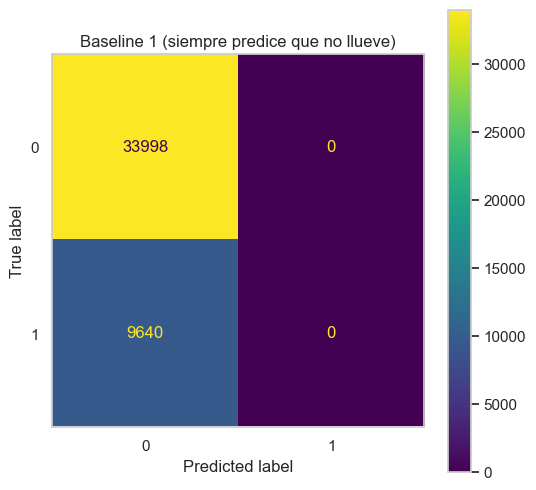

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

cm_nb = confusion_matrix(y_test, y_pred_baseline1_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 1 (siempre predice que no llueve)");

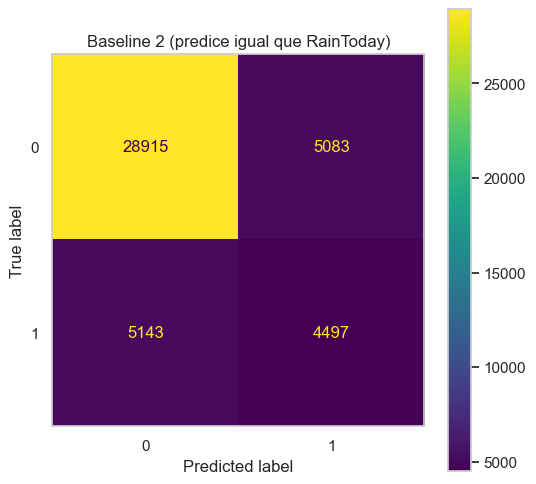

In [87]:

cm_nb = confusion_matrix(y_test, y_pred_baseline2_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 2 (predice igual que RainToday)");

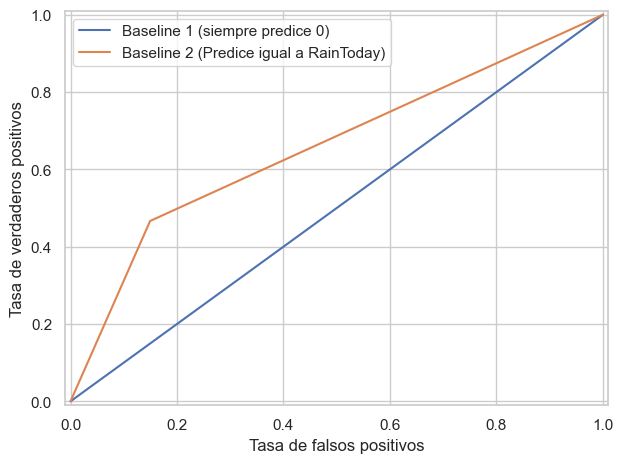

In [88]:
from sklearn.metrics import auc, roc_curve

fpr_baseline1, tpr_baseline1, _ = roc_curve(y_test, y_pred_baseline1_test)
fpr_baseline2, tpr_baseline2, _ = roc_curve(y_test, y_pred_baseline2_test)

plt.plot(fpr_baseline1, tpr_baseline1, label="Baseline 1 (siempre predice 0)")
plt.plot(fpr_baseline2, tpr_baseline2, label="Baseline 2 (Predice igual a RainToday)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();

In [89]:
print("AUC")
print(f"AUC (baseline 1): {auc(fpr_baseline1, tpr_baseline1)}")
print(f"AUC (baseline 2): {auc(fpr_baseline2, tpr_baseline2)}")

AUC
AUC (baseline 1): 0.5
AUC (baseline 2): 0.6584924906493158
